<a href="https://colab.research.google.com/github/hrushikeshsahu19/IPL-data-analysis/blob/main/Hrushikesh_Sahu_Team_3_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

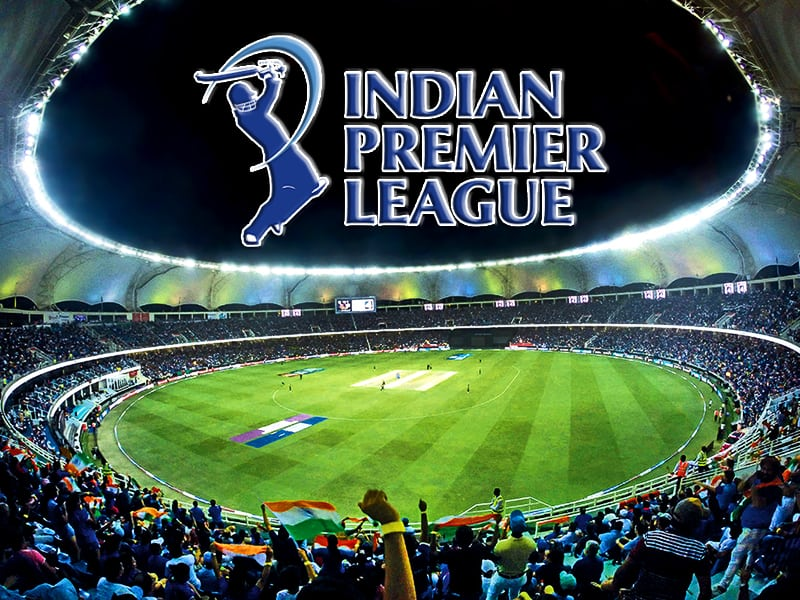

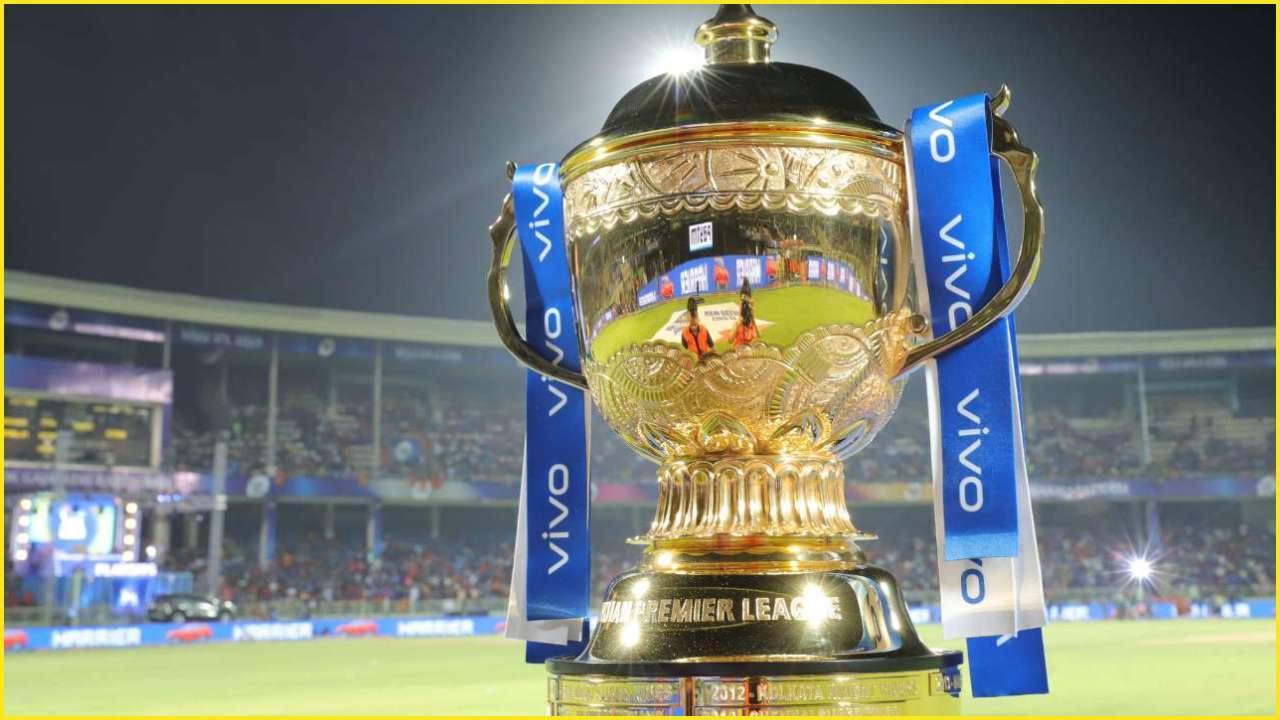

In [ ]:
#import the library
import pandas as pd
import numpy as np
import statistics 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.DataSet :teams.csv

In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
teams_df = pd.read_csv(working_directory + 'teams.csv')

In [ ]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [ ]:
teams_df.describe()

,team1
count,15
unique,15
top,Mumbai Indians
freq,1


In [ ]:
teams_df.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


In [ ]:
teams_df

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


There are 15 teams in our Team data set they are as follows

# 1.Pune Warriors
# 2.Kochi Tuskers Kerala
# 3.Rajasthan Royals
# 4.Kochi Tuskers Kerala
#5.Gujarat Lions
#6.Chennai Super Kings
#7.Rising Pune Supergiants
#8.Delhi Daredevils
#9.Deccan Chargers
#10.Delhi Capitals
#11.Mumbai Indians
#12.Sunrisers Hyderabad
#13.Rising Pune Supergiant
#14.Royal Challengers Bangalore
#15.Kings XI Punjab

# **2.DataSet  : matches.csv**


In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
matches_df = pd.read_csv(working_directory + 'matches.csv')

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches_df.shape

(756, 18)

 there are 756 rows and 18 columns in our matches data set . each rows indicate that  IPL matches held between 2008 and 2019. each column represent the corresponding features

In [ ]:
list(matches_df.columns)

['id',
 'Season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [ ]:
matches_df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [ ]:
matches_df['dl_applied'].unique()

array([0, 1])

there are 18 column in our matches dataset.let's know which column signify what values

1.id :match id

2.Season:Season of the IPL match

3.city:which city IPL match was heald

4.date:date of the IPL match

5.team1:One of the teams of the IPL match

6.team2:other teams of the IPL match

7:toss_winner:the team which won the toss

8.toss_decision:it is decided by toss winning team it may either fild or bat

9.result:result is one of the values in our list ['normal', 'tie', 'no result']

10:dl_applied: it is binary type it may be 0 or 1

11.winner:winner of the match 

12.win_by_runs:winning team won the match by how much run

13.win_by_wickets:winning team won the match by how much wicket

14.player_of_match:who is the best performer of the match in winnning team

15:venue:name of the play ground

16.umpire1:STRAIGHT umpire

17.umpire2: SQUARE LEG umpire

18:umpire3:third umpire who has access to video replays

In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_df.isnull().values.sum()


656

In our matches data set some null values in city , winner, player_of_match , venue ,umpire 1,umpire 2 and umpire 3 columns

In [ ]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
len(matches_df['team1'].unique())

15

In [ ]:
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
len(matches_df['team2'].unique())

15

In [ ]:
list(matches_df['Season'].unique())

['IPL-2017',
 'IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2018',
 'IPL-2019']

This matches data set contain folling season of IPL match

1.IPL-2017

2.IPL-2008

3.IPL-2009

4.IPL-2010

5.IPL-2011

6.IPL-2012

7.IPL-2013

8.IPL-2014

9.IPL-2015

10.IPL-2016

11.IPL-2018

12.IPL-2019

Both team 1 and team 2 have 15 unique team

In [ ]:
win_df=matches_df['winner'].value_counts().reset_index()

In [ ]:
win_df.head()

,index,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82


In [ ]:
win_df.tail()

,index,winner
10,Pune Warriors,12
11,Delhi Capitals,10
12,Rising Pune Supergiant,10
13,Kochi Tuskers Kerala,6
14,Rising Pune Supergiants,5


In [ ]:
ax=win_df.plot(x='index',y='winner',kind='bar',figsize=(18,10))
ax.set_xlabel('Team Name')
ax.set_ylabel('Number Of Times Winner')
ax.set_title('which teams win How much times')


This graph shows that Mumbai indians team won the match highest numbers of time that is 109, chennai Super King won the match 2nd highest time that is 100 and Kolkata King Riders won the match 3rd highest time that is  92

This graph also shows that Rising Pune Supergiants won the match least number of times  that is 5,Kochi Tuskers Kerala won the match second  least number of times that is 6 and Delhi Capitals  and Rising Pune Supergiant won the match third  least number times that is 10

In [ ]:
city_df=matches_df['city'].value_counts().reset_index()

In [ ]:
city_df.head()

,index,city
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64


In [ ]:
city_df.tail(10)

,index,city
22,Cape Town,7
23,Abu Dhabi,7
24,Raipur,6
25,Sharjah,6
26,Kochi,5
27,Kanpur,4
28,Nagpur,3
29,East London,3
30,Kimberley,3
31,Bloemfontein,2


In [ ]:
bx=city_df.plot(x='index',y='city',kind='bar',figsize=(20,10))
bx.set_xlabel('City Name')
bx.set_ylabel('Number of times match happened')
bx.set_title(' City-match graph')

This graph shows that most number IPL match are played in Mumbai City  that is that 101,second most match are played in Kolkata city that is 77 and third most match are played in Delhi city that is 74

This graph also shows that least number of IPL match are played in  Bloemfontein city that is 2 ,second least number of IPL match are played in Kimberley city,Nagpur city ,East London  City that is 3 and third least number of IPL match are played in Kanpur city that is 4

In [ ]:
win_max_run=matches_df.groupby('winner')['win_by_runs'].max().reset_index()

In [ ]:
win_max_wicket=matches_df.groupby('winner')['win_by_wickets'].max().reset_index()

In [ ]:
win_run_wicket_df=win_max_run.merge(win_max_wicket,how='inner')

In [ ]:
win_run_wicket_df.describe()

,win_by_runs,win_by_wickets
count,15.000000,15.000000
mean,82.000000,9.133333
std,47.611523,1.245946
min,1.000000,7.000000
25%,38.500000,8.500000
50%,97.000000,10.000000
75%,114.500000,10.000000
max,146.000000,10.000000


Text(0.5, 1.0, 'Team win by maximum run and maximun wicket')

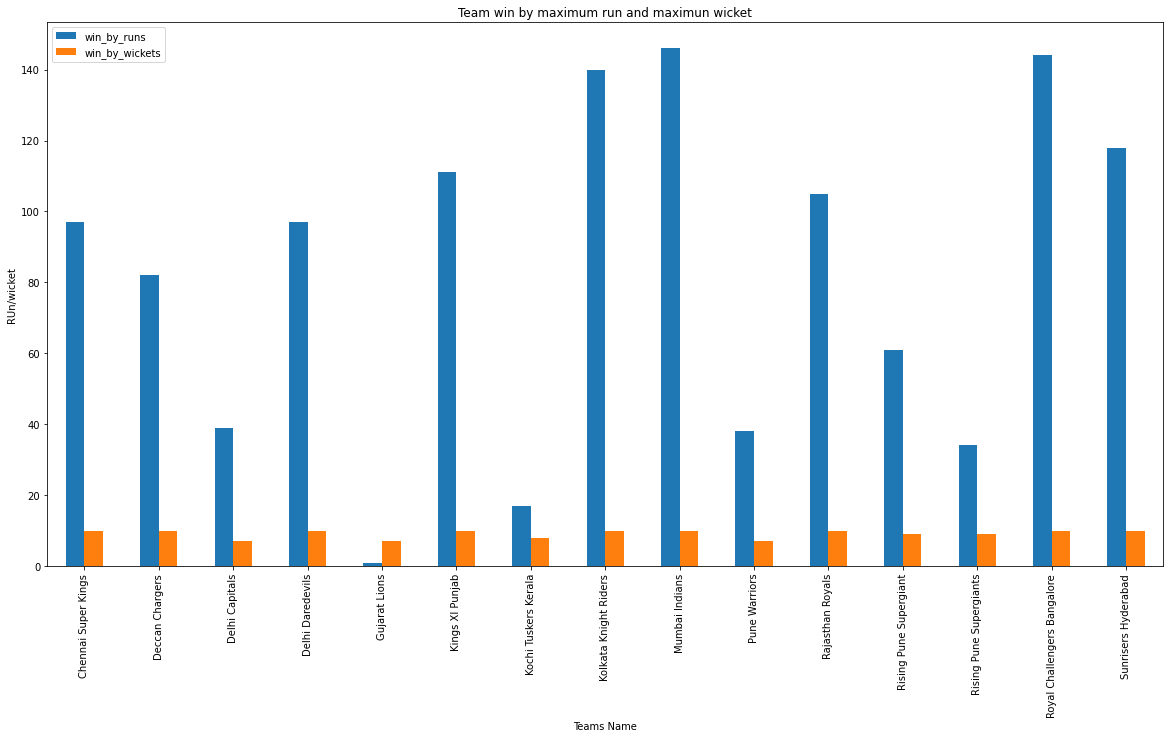

In [ ]:
cx=win_run_wicket_df.plot(x='winner',y=['win_by_runs','win_by_wickets'],kind='bar',figsize=(20,10))
cx.set_xlabel('Teams Name')
cx.set_ylabel('RUn/wicket')
cx.set_title('Team win by maximum run and maximun wicket')

This graph shows that Mumbai Indians is own by highest run in IPL  and most of the teams won by 10 wicket in IPL data set

In [ ]:
player_of_match_df=matches_df['player_of_match'].value_counts().reset_index()

In [ ]:
player_of_match_df.head()

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17


Text(0.5, 1.0, 'player of the match ')

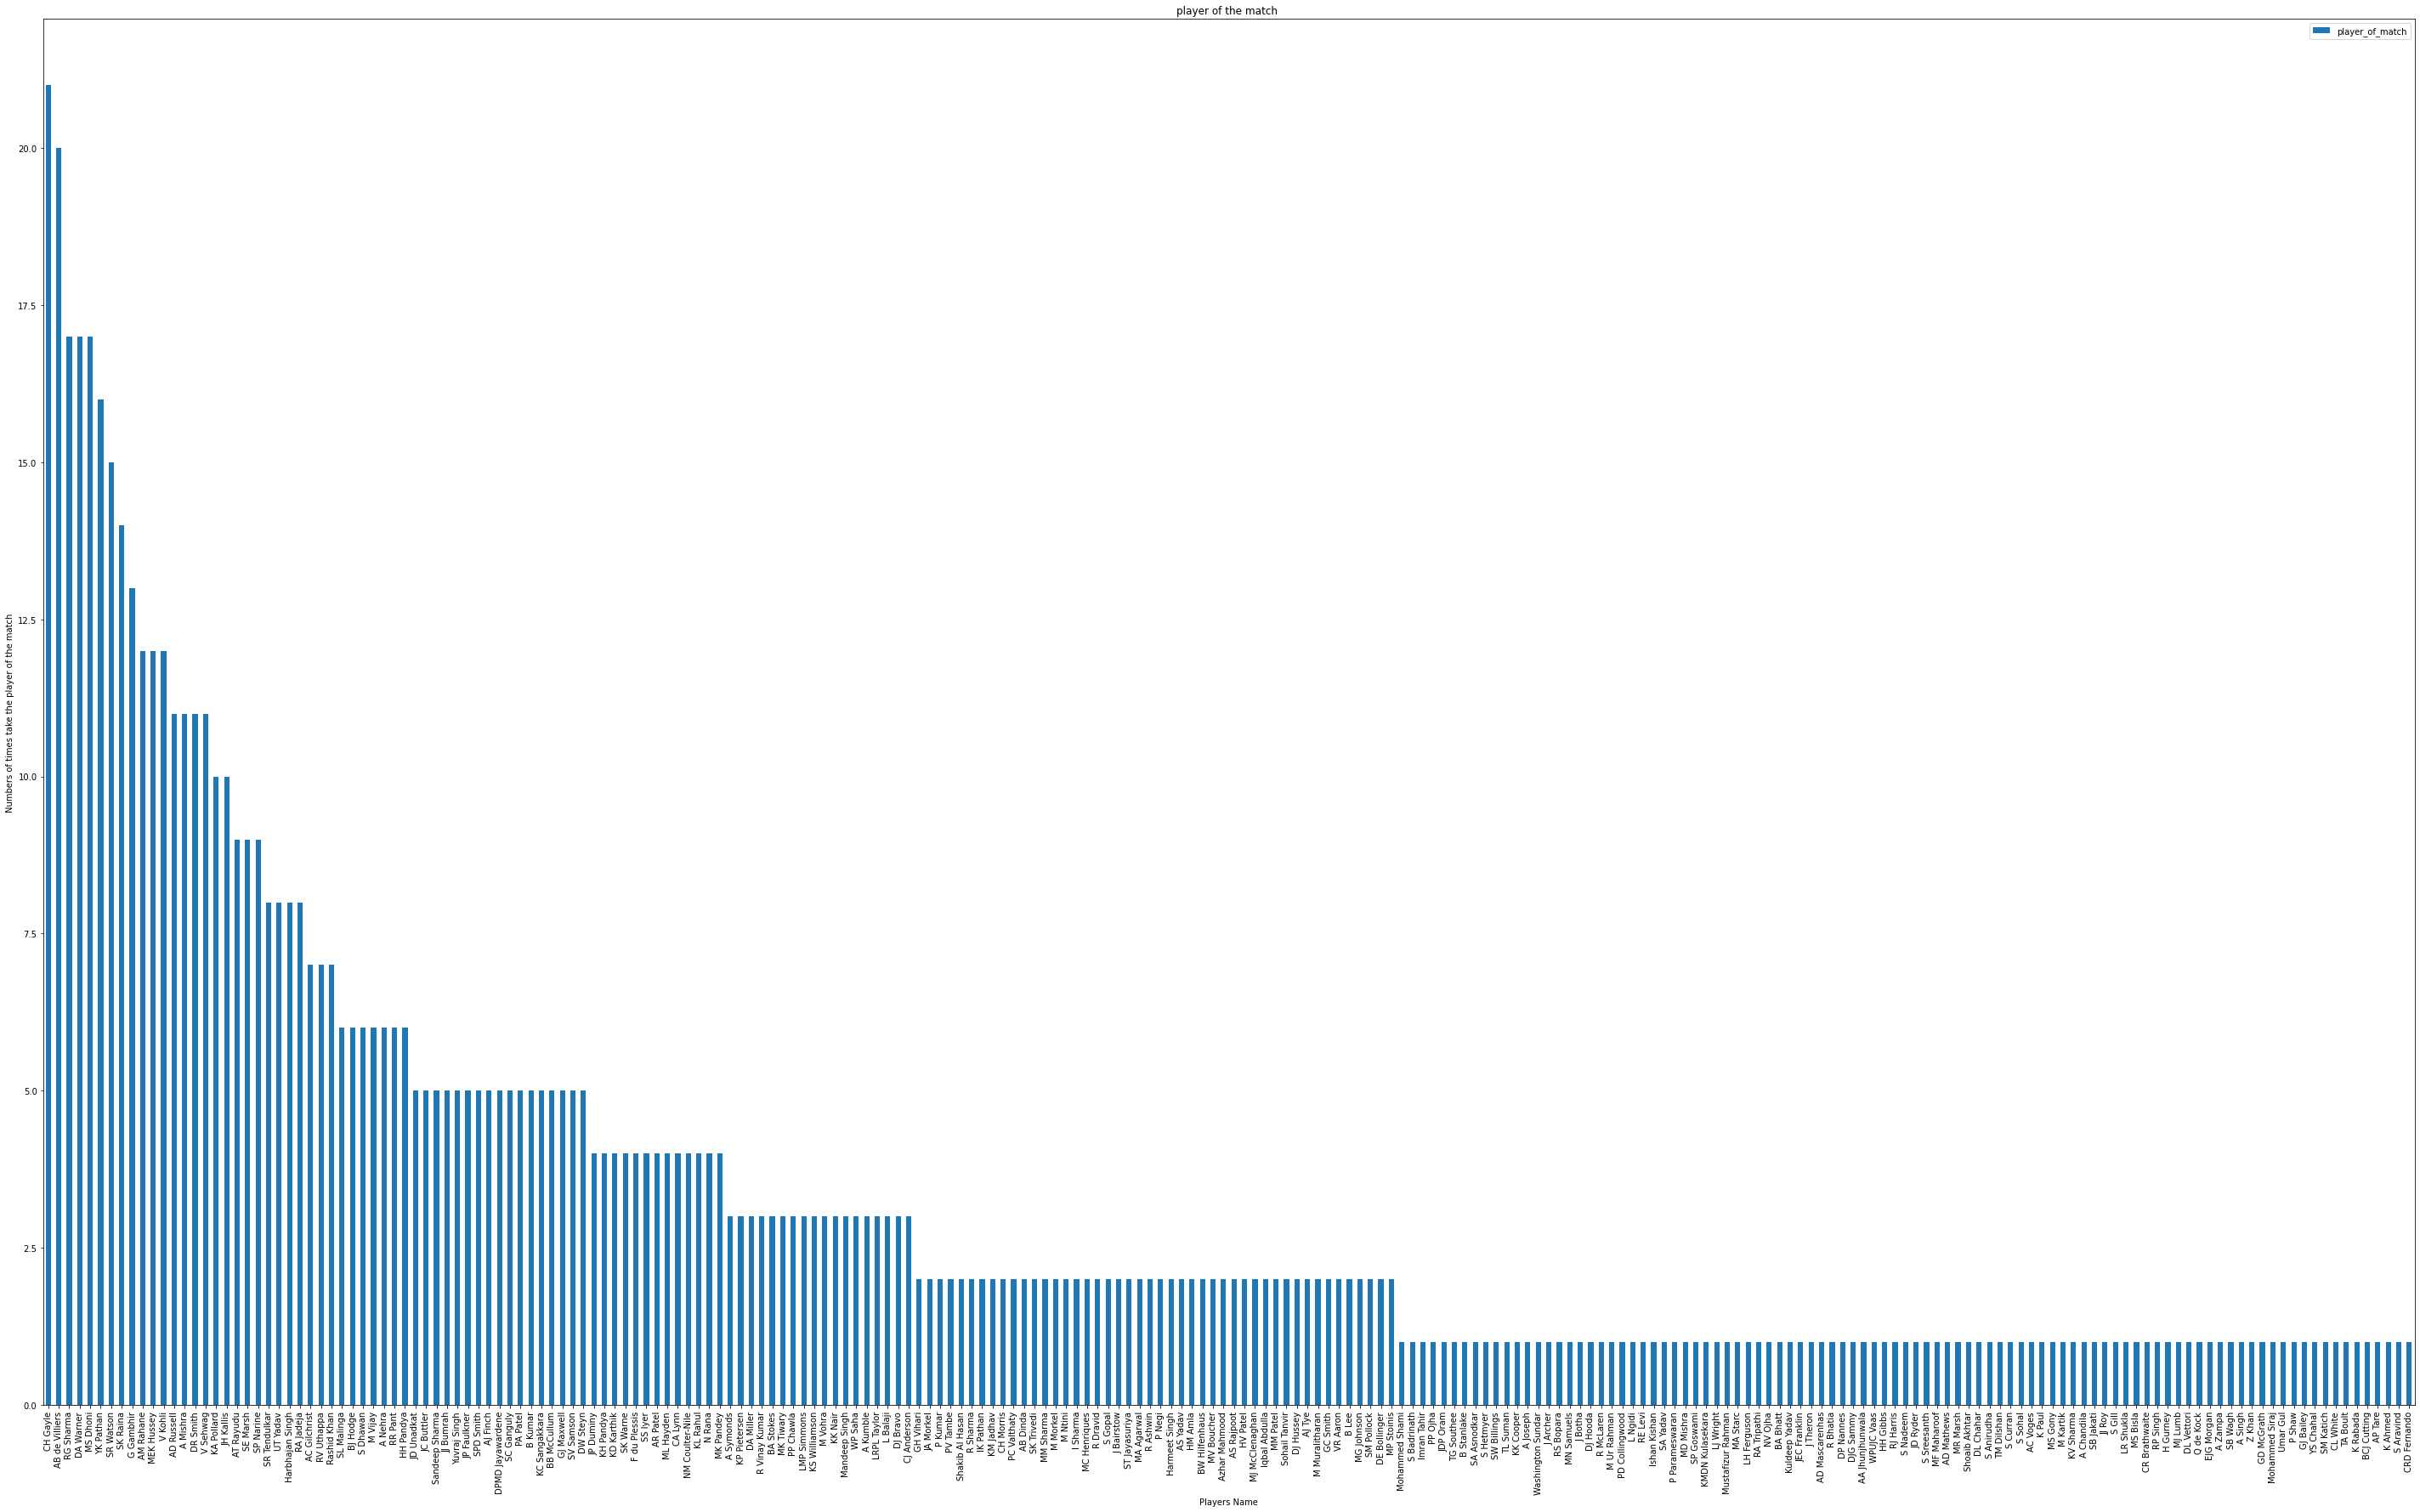

In [ ]:
dx=player_of_match_df.plot(x='index',y='player_of_match',kind='bar',figsize=(50,30))
dx.set_xlabel('Players Name')
dx.set_ylabel('Numbers of times take the player of the match')
dx.set_title('player of the match ')

In [ ]:
player_of_match_df.describe()

,player_of_match
count,226.000000
mean,3.327434
std,3.736766
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,21.000000


In [ ]:
#find mean 
np.mean(player_of_match_df['player_of_match'])

3.327433628318584

In [ ]:
#find the median
np.median(player_of_match_df['player_of_match'])

2.0

In [ ]:
#find mode
statistics.mode(player_of_match_df['player_of_match'])

1

This graph shows that CH gayle have taken 21 times player of the match tropy,AB de Villiers have taken 20  times player of the trophy  and RG Sharma	,MS Dhoni	and DA Warner	 have taken 17 times player of the match

This graph looks likes positive skew distribution because most of values are lies in left part of our graph

positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode


negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode

In [ ]:
match_win_df=matches_df.groupby(['team1','team2'])['winner'].count()

In [ ]:
len(match_win_df)

139

In [ ]:
match_win_df.head(60)

team1                 team2                      
Chennai Super Kings   Deccan Chargers                 8
                      Delhi Capitals                  1
                      Delhi Daredevils               12
                      Kings XI Punjab                11
                      Kochi Tuskers Kerala            2
                      Kolkata Knight Riders          12
                      Mumbai Indians                 12
                      Pune Warriors                   4
                      Rajasthan Royals               12
                      Royal Challengers Bangalore    10
                      Sunrisers Hyderabad             5
Deccan Chargers       Chennai Super Kings             2
                      Delhi Daredevils                8
                      Kings XI Punjab                 7
                      Kochi Tuskers Kerala            1
                      Kolkata Knight Riders           2
                      Mumbai Indians                  

In [ ]:
match_win_df.tail(60)

team1                        team2                      
Mumbai Indians               Kolkata Knight Riders          11
                             Pune Warriors                   3
                             Rajasthan Royals               14
                             Rising Pune Supergiant          2
                             Rising Pune Supergiants         1
                             Royal Challengers Bangalore    13
                             Sunrisers Hyderabad             7
Pune Warriors                Chennai Super Kings             2
                             Deccan Chargers                 1
                             Delhi Daredevils                4
                             Kings XI Punjab                 4
                             Kolkata Knight Riders           2
                             Mumbai Indians                  3
                             Rajasthan Royals                3
                             Royal Challengers Bangalore     

The above data set gives when team1 match with team2 ,how many times team1 won the match

In [ ]:
venue_df=matches_df['venue'].value_counts().reset_index()

In [ ]:
venue_df

,index,venue
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


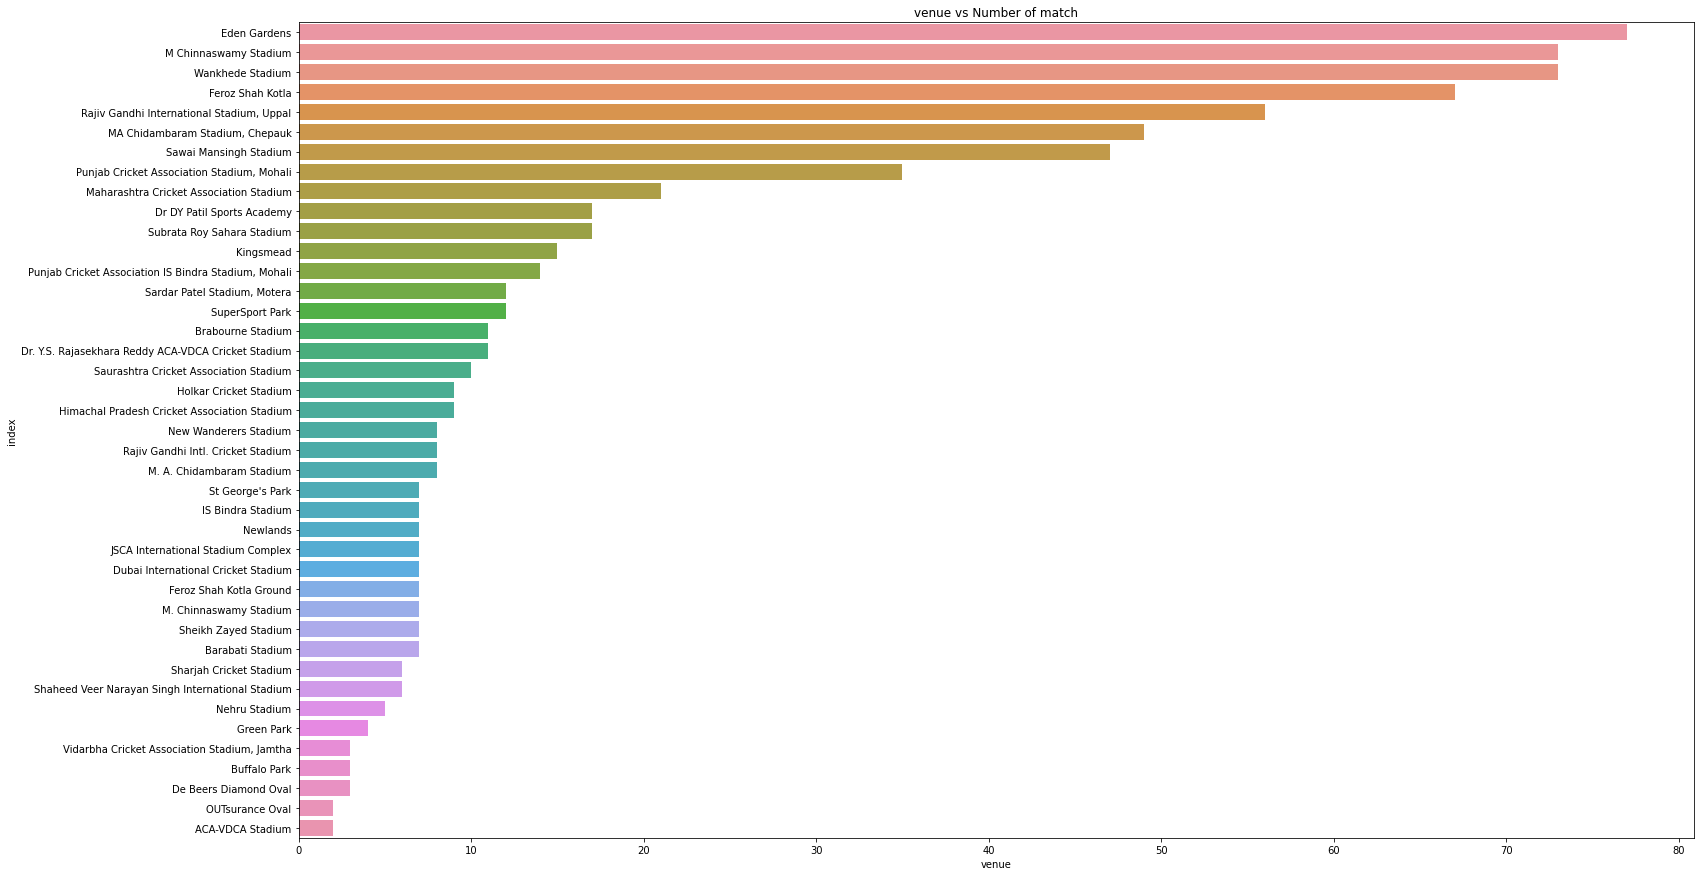

In [ ]:
plt.figure(figsize=(25,15))
plt.title("venue vs Number of match")
sns.barplot(x = 'venue', y = 'index', data = venue_df) 

This graph shows that most of the match are playing in Eden gardens second most matches are playing  in Wankhede Stadium and M Chinnaswamy Stadium and third most matches are playing in Feroz Shah Kotla	


this graph also shows that least number of matches are playing in OUTsurance Oval	 and ACA-VDCA Stadium

In [ ]:
season_win_df = matches_df.groupby('Season')['winner'].value_counts()


In [ ]:
 matches_df.groupby('Season')['winner'].value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [ ]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'Number_of_times_wins'])
for items in season_win_df.iteritems():
  my_year= items[0][0].split('-')   
  if int(my_year[1])==year:
    win_series = ({
            'year': items[0][0],
            'team': items[0][1],
            'Number_of_times_wins': items[1]
        })
    win_per_season_df = win_per_season_df.append(win_series,ignore_index=True)
    year += 1 

In [ ]:
win_per_season_df

,year,team,Number_of_times_wins
0,IPL-2008,Rajasthan Royals,13
1,IPL-2009,Delhi Daredevils,10
2,IPL-2010,Mumbai Indians,11
3,IPL-2011,Chennai Super Kings,11
4,IPL-2012,Kolkata Knight Riders,12
5,IPL-2013,Mumbai Indians,13
6,IPL-2014,Kings XI Punjab,12
7,IPL-2015,Chennai Super Kings,10
8,IPL-2016,Sunrisers Hyderabad,11
9,IPL-2017,Mumbai Indians,12


The above data gives us in which year which teams won the match maximun times like in IPL-2008 Rajasthan Royals win the match 13 number of times 

In [ ]:
umpire1_df=matches_df['umpire1'].value_counts().reset_index()

In [ ]:
umpire1_df

,index,umpire1
0,HDPK Dharmasena,73
1,Asad Rauf,51
2,S Ravi,49
3,AK Chaudhary,43
4,Aleem Dar,38
...,...,...
56,SL Shastri,1
57,Sundaram Ravi,1
58,Ulhas Gandhe,1
59,Nanda Kishore,1


In [ ]:
umpire1_df.tail(5)

,index,umpire1
56,SL Shastri,1
57,Sundaram Ravi,1
58,Ulhas Gandhe,1
59,Nanda Kishore,1
60,SJA Taufel,1


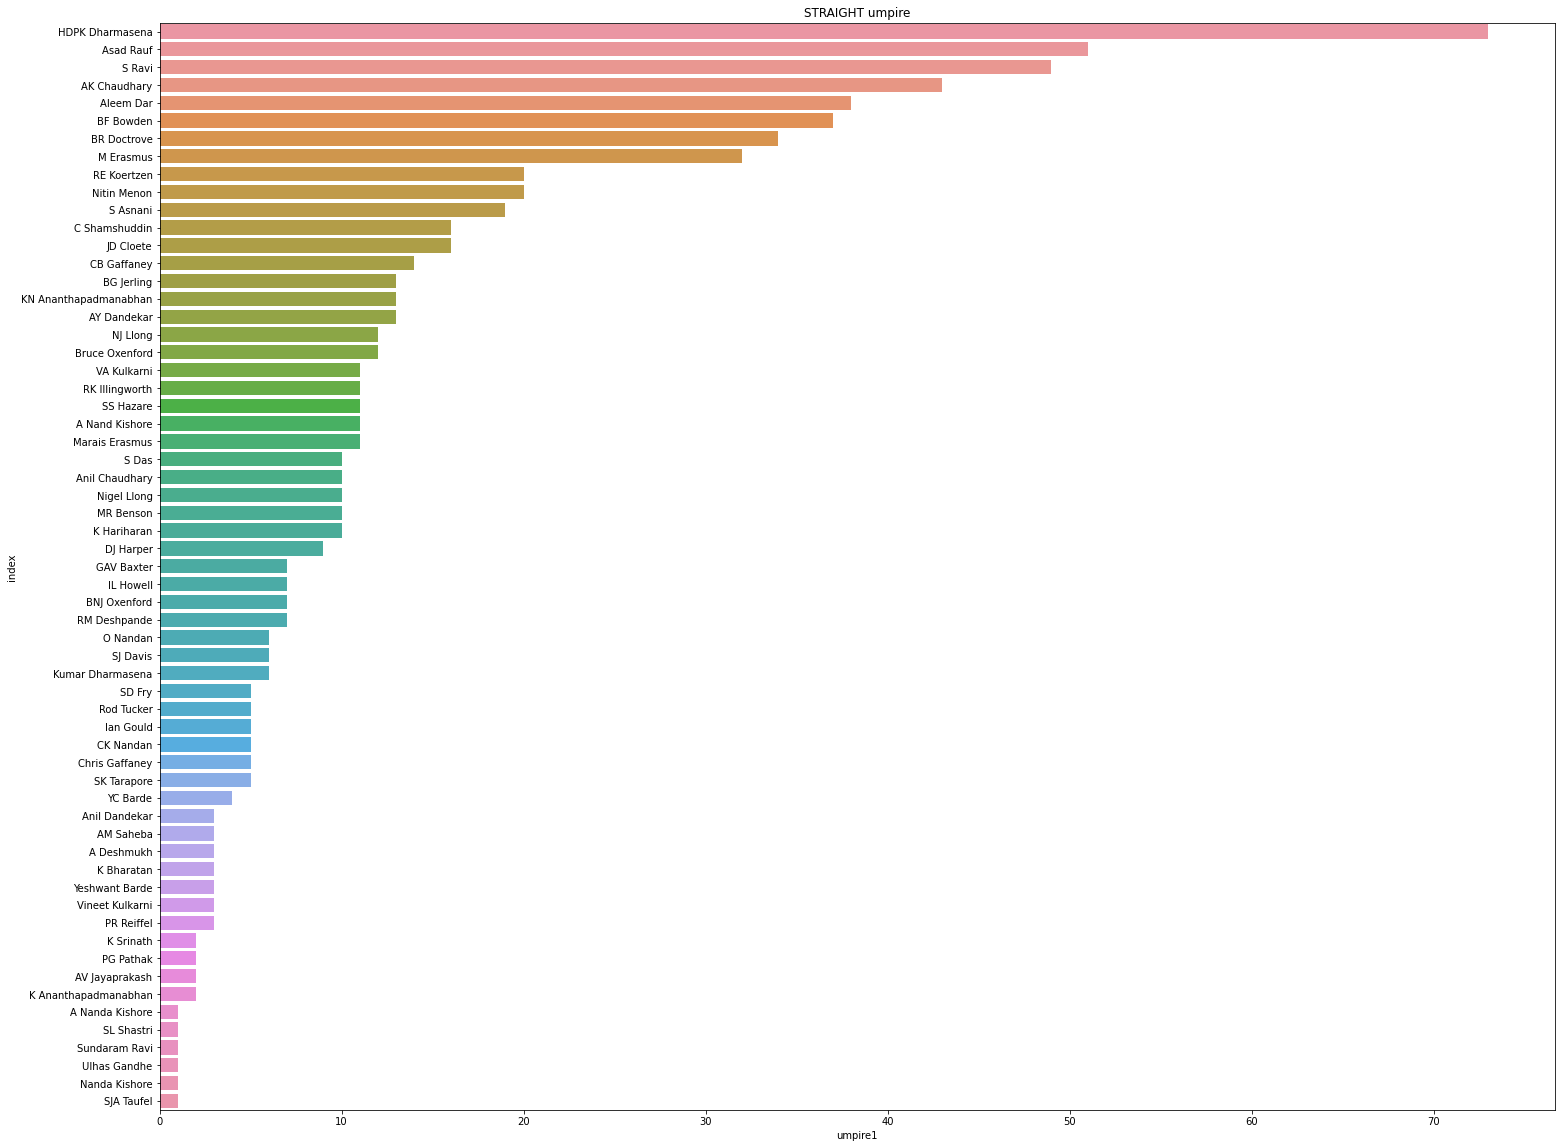

In [ ]:
plt.figure(figsize=(25,20))
plt.title('STRAIGHT umpire')
sns.barplot(x = 'umpire1', y = 'index', data = umpire1_df) 

this graph shows that  	HDPK Dharmasena is Straight umpire for  most of the times ,Asad Rauf is Straight umpire for second most number of times and S Ravi is Straight umpire for third most number of times 

In [ ]:
umpire2_df=matches_df['umpire2'].value_counts().reset_index()

In [ ]:
umpire2_df

,index,umpire2
0,S Ravi,57
1,C Shamshuddin,57
2,SJA Taufel,54
3,RJ Tucker,38
4,CK Nandan,36
...,...,...
60,SJ Davis,1
61,Nand Kishore,1
62,KN Ananthapadmanabhan,1
63,Ian Gould,1


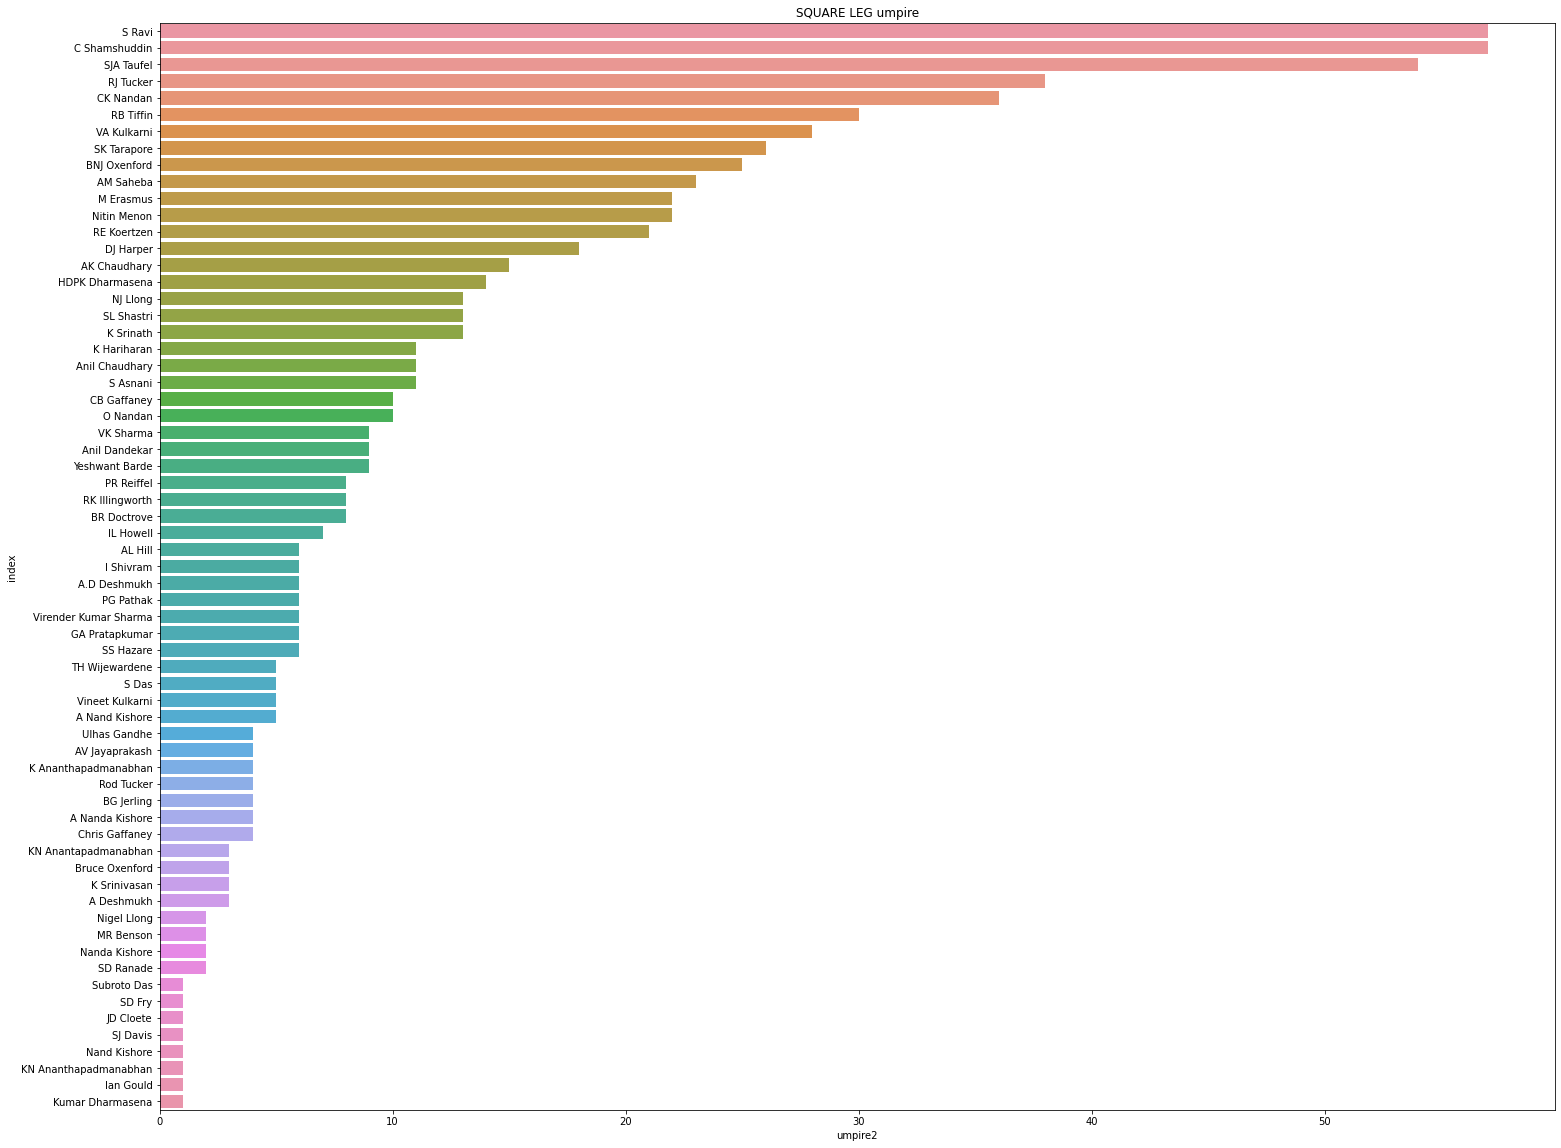

In [ ]:
plt.figure(figsize=(25,20))
plt.title('SQUARE LEG umpire')
sns.barplot(x = 'umpire2', y = 'index', data = umpire2_df)

this graph shows that S Ravi and 	C Shamshuddin is the square leg umpire for most of the times ,SJA Taufel is square leg umpire for second most of times and RJ Tucker and CK Nandan is square leg umpire for third most numbers of times 

In [ ]:
umpire3_df=matches_df['umpire3'].value_counts().reset_index()

In [ ]:
umpire3_df

,index,umpire3
0,C Shamshuddin,10
1,Nitin Menon,10
2,O Nandan,10
3,Anil Chaudhary,9
4,Vineet Kulkarni,8
5,S Ravi,8
6,Anil Dandekar,7
7,Yeshwant Barde,7
8,Bruce Oxenford,7
9,Chris Gaffaney,6


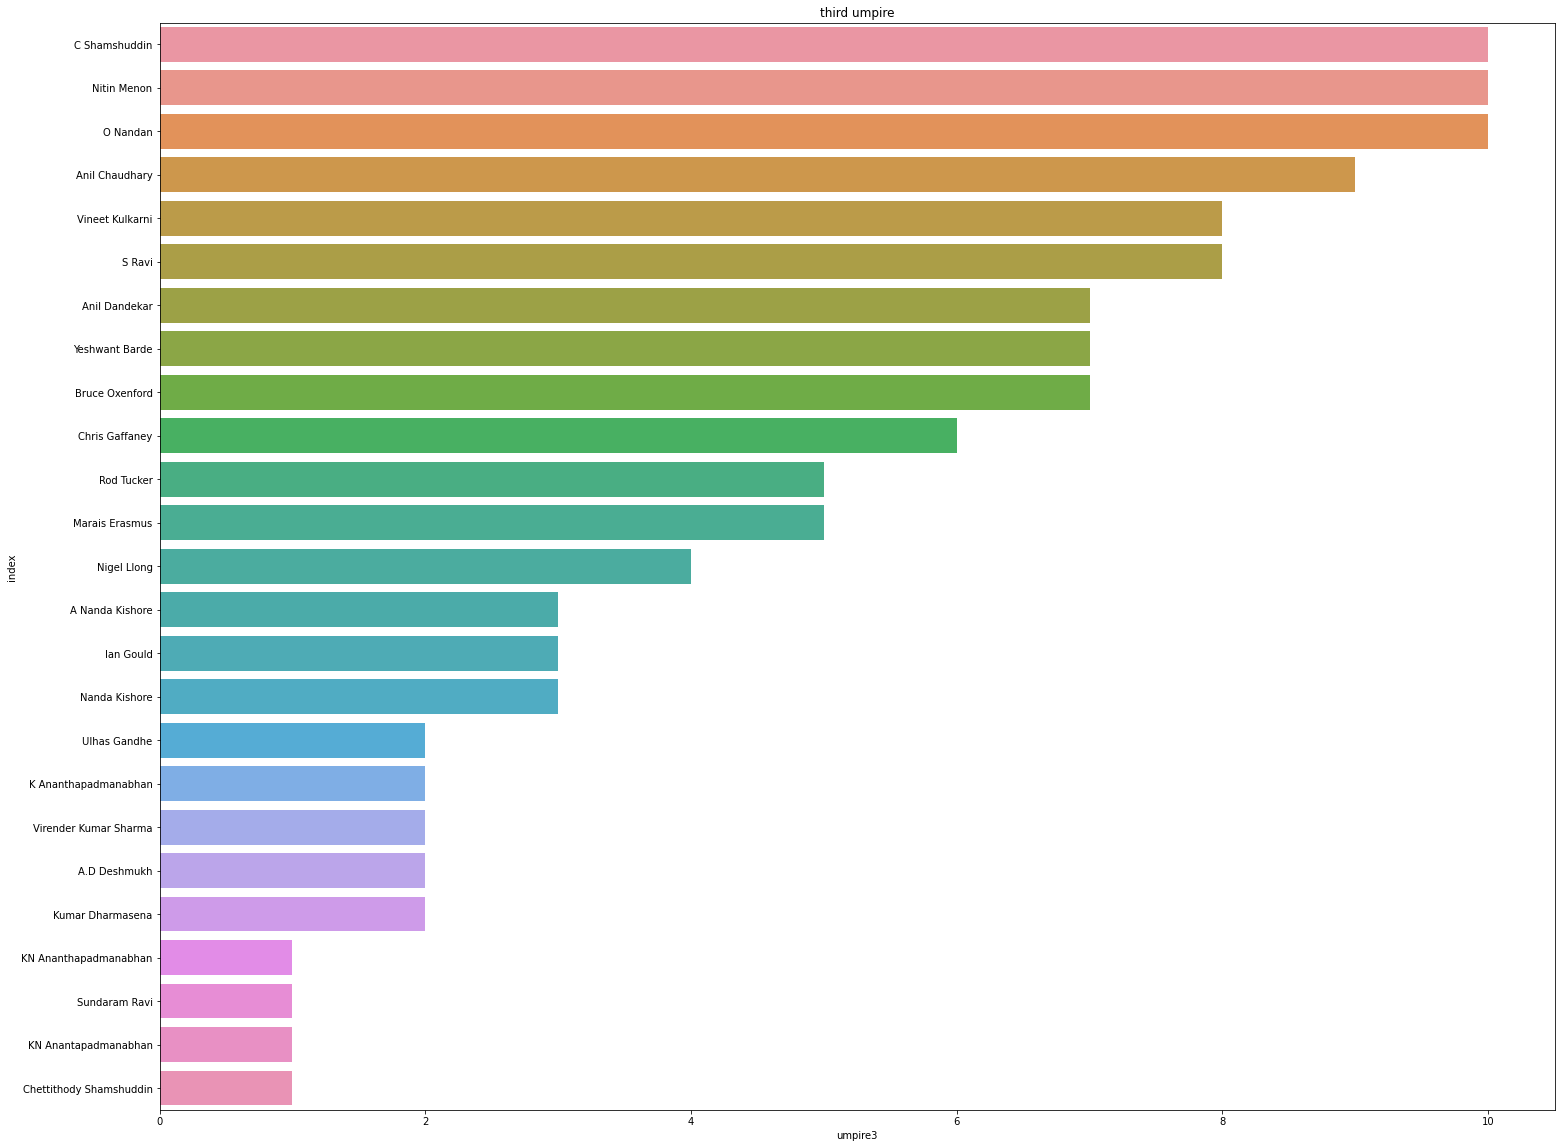

In [ ]:
plt.figure(figsize=(25,20))
plt.title('third umpire')
sns.barplot(x = 'umpire3', y = 'index', data = umpire3_df)

this graph shows that O Nandan ,C Shamshuddin, Nitin Menon	 are third umpire for most of the times 

# 3.Dataset :most_runs_average_strikerate.csv

In [ ]:
#load the data set
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
striker_df = pd.read_csv(working_directory + 'most_runs_average_strikerate.csv')

striker data set contain following columns

1.batsman:name of the batsman

2.total_runs:total runs made by batsman

3.out:How many times they are out

4.average:total_run/total_number of they play

5.strikerate: strike rate (s/r) is defined for a batsman as the average number of runs scored per 100 balls faced.The higher the strike rate, the more effective a batsman is at scoring quickly.

In [ ]:
striker_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
striker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


average: columns contain some null values

In [ ]:
striker_df.shape

(516, 6)

This data set contain 516 rows and 6 columns .each row specify  name of the batsman and columns specify corresponding features of the batsman 

In [ ]:
striker_df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [ ]:
striker_df['average']

0      35.697368
1      33.662500
2      30.447205
3      41.377193
4      33.583942
         ...    
511     0.000000
512     0.000000
513     0.000000
514     0.000000
515     0.000000
Name: average, Length: 516, dtype: float64

In [ ]:
striker_df.tail(50)

,batsman,total_runs,out,numberofballs,average,strikerate
466,R Ninan,3,1,6,3.0,50.000000
467,D Kalyankrishna,3,1,7,3.0,42.857143
468,JE Taylor,3,0,3,NaN,100.000000
469,H Viljoen,3,2,5,1.5,60.000000
470,BAW Mendis,3,2,6,1.5,50.000000
471,Mohammad Asif,3,2,6,1.5,50.000000
472,Kamran Khan,3,1,5,3.0,60.000000
473,Younis Khan,3,1,7,3.0,42.857143
474,KP Appanna,2,1,3,2.0,66.666667
475,RS Gavaskar,2,1,8,2.0,25.000000


In [ ]:
striker_df['average']=striker_df['average'].replace(np.nan,14.60)

NAN value is repalced by median of the average columns

In [ ]:
striker_df

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [ ]:
top_run_batsman=striker_df[['batsman','total_runs']]
top_run_batsman.sort_values(by=['total_runs'], inplace=True,ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top_run_batsman

,batsman,total_runs
0,V Kohli,5426
1,SK Raina,5386
2,RG Sharma,4902
3,DA Warner,4717
4,S Dhawan,4601
...,...,...
503,U Kaul,0
502,YA Abdulla,0
501,C Nanda,0
500,K Ahmed,0


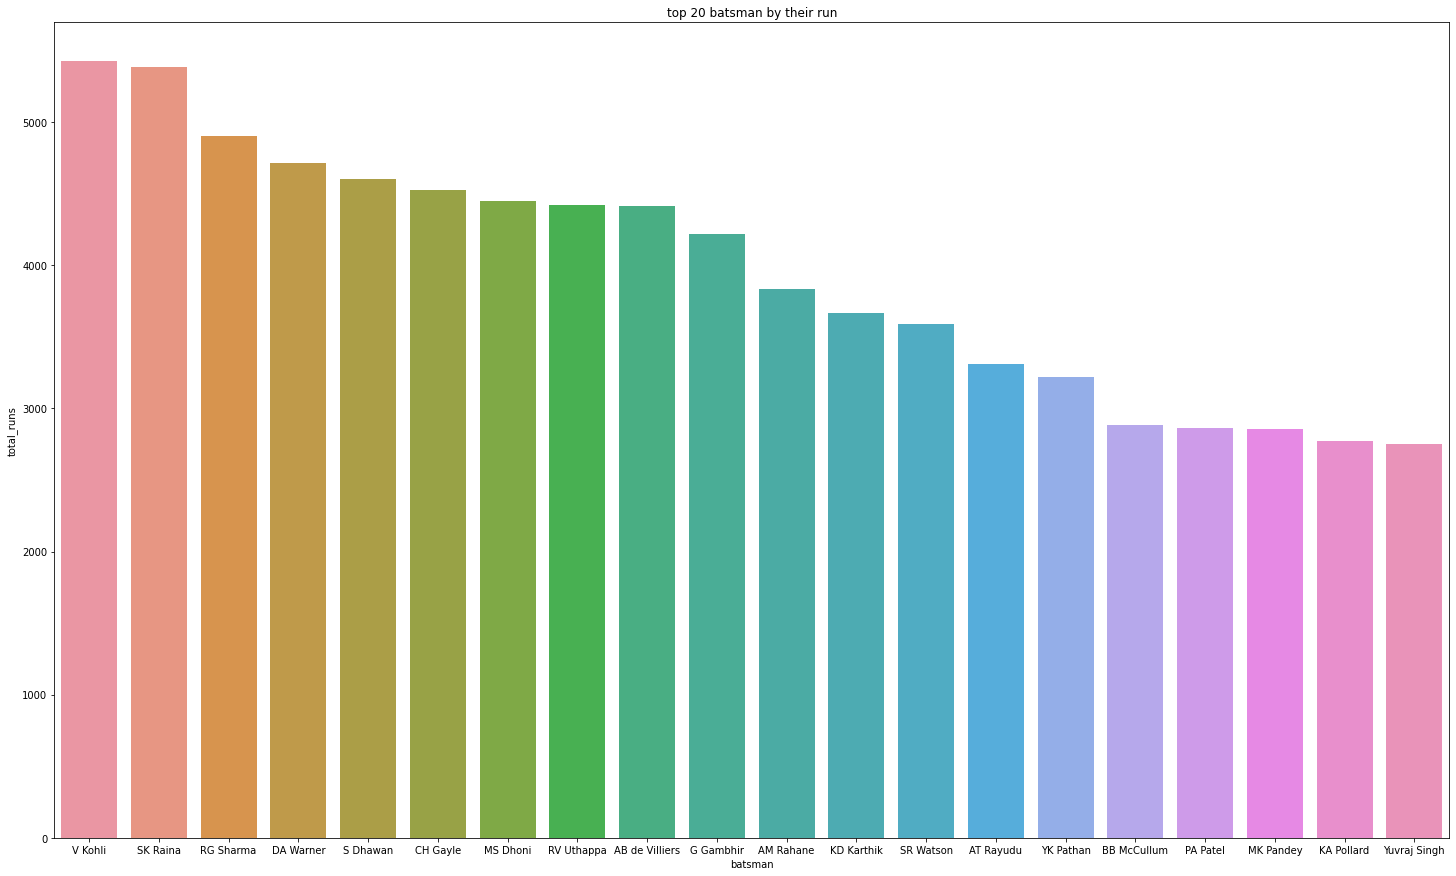

In [ ]:
plt.figure(figsize=(25,15))
plt.title('top 20 batsman by their run')
sns.barplot(x = 'batsman', y = 'total_runs', data = top_run_batsman[:20])

this graph shows that V Kohli have  score maximun  run in IPL ,SK Raina score second most run in IPL and RG Sharma score third most run in IPL

In [ ]:
top_ball_batsman=striker_df[['batsman','numberofballs']]
top_ball_batsman.sort_values(by=['numberofballs'], inplace=True,ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top_ball_batsman

,batsman,numberofballs
0,V Kohli,4111
1,SK Raina,3916
2,RG Sharma,3742
4,S Dhawan,3665
9,G Gambhir,3400
...,...,...
501,C Nanda,1
497,NJ Rimmington,1
494,DP Vijaykumar,1
489,LH Ferguson,1


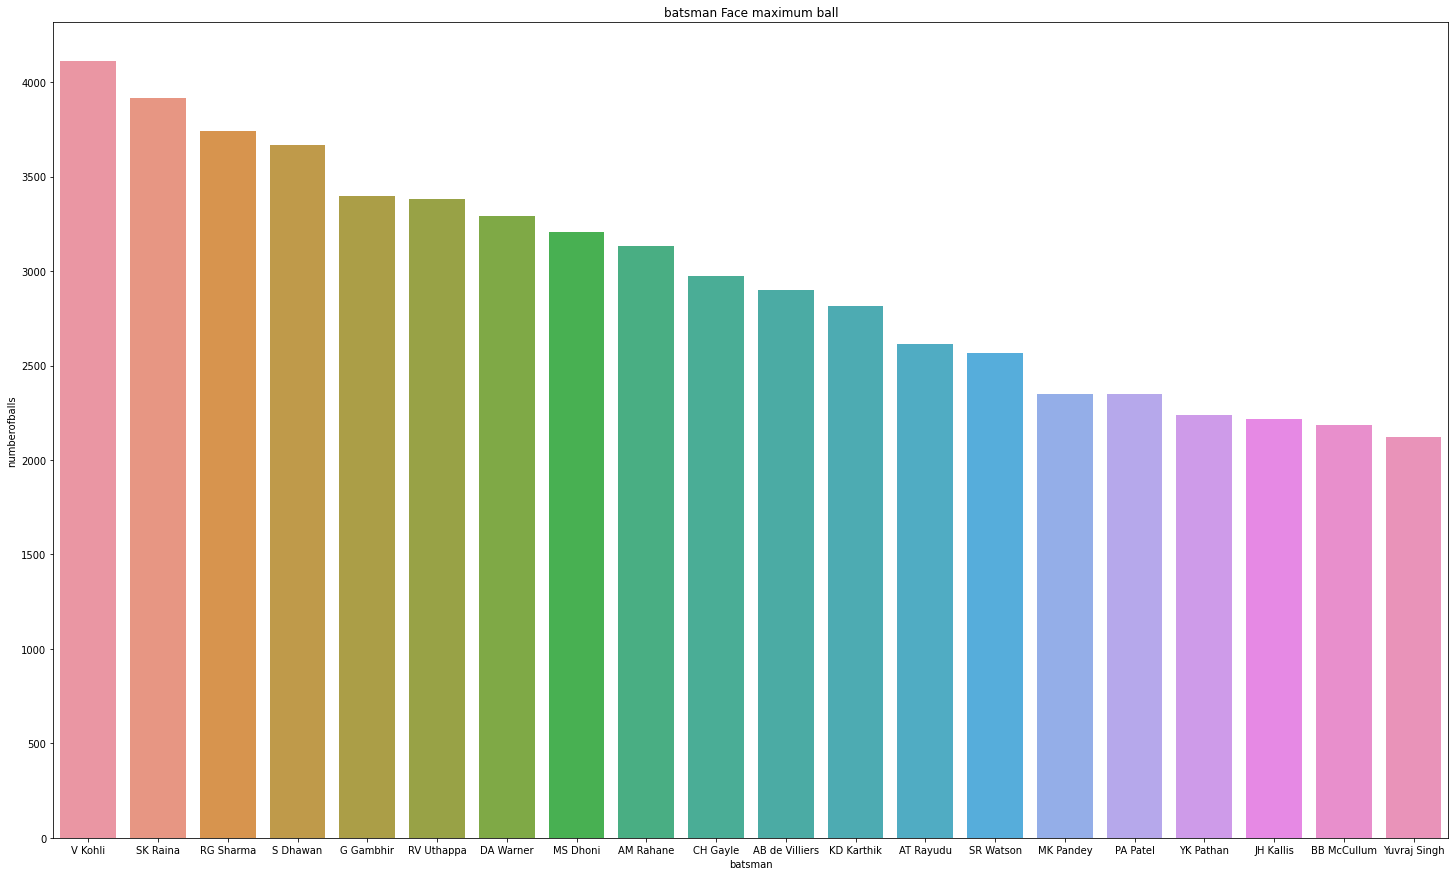

In [ ]:
plt.figure(figsize=(25,15))
plt.title('batsman Face maximum ball')
sns.barplot(x = 'batsman', y = 'numberofballs', data = top_ball_batsman[:20])

this graph shows that V Kholi face maximum number of ball in IPL,SK Raina face second most number of balll in IPL and RG Sharma face third most number of ball in IPL

In [ ]:
top_out_batsman=striker_df[['batsman','out']]
top_out_batsman.sort_values(by=['out'], inplace=True,ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top_out_batsman

,batsman,out
2,RG Sharma,161
1,SK Raina,160
7,RV Uthappa,156
0,V Kohli,152
11,KD Karthik,138
...,...,...
481,RG More,0
398,DAJ Bracewell,0
486,PM Sarvesh Kumar,0
386,A Joseph,0


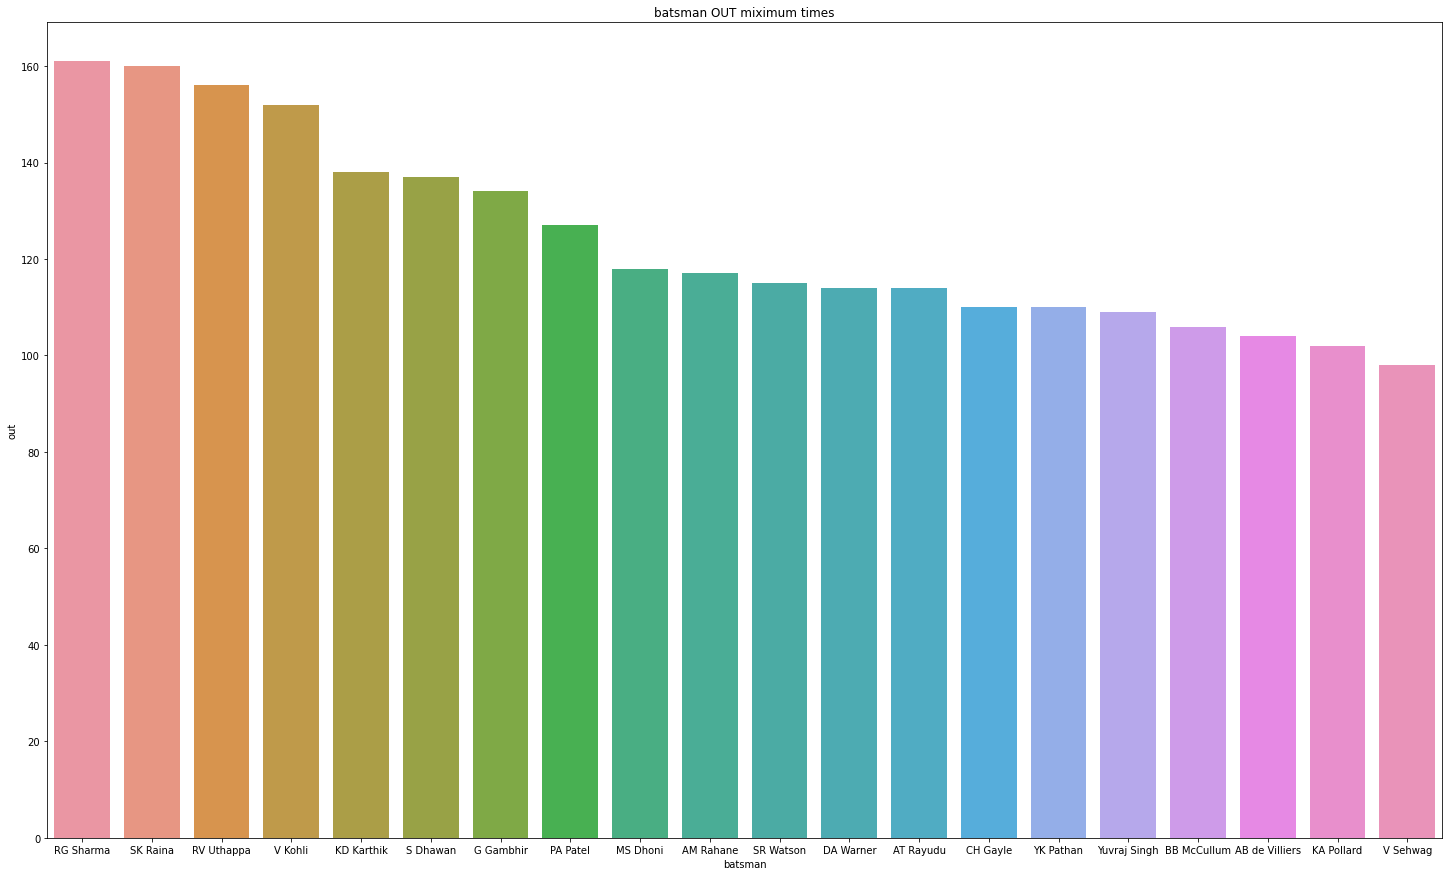

In [ ]:
plt.figure(figsize=(25,15))
plt.title('batsman OUT miximum times')
sns.barplot(x = 'batsman', y = 'out', data = top_out_batsman[:20])

this graph shows that RG Sharma out most number of times in IPL, SK Raina out Second most numbers of times in IPL and RV Uthappa  out third most numbers of times in IPL

In [ ]:
top_average_batsman=striker_df[['batsman','average']]
top_average_batsman.sort_values(by=['average'], inplace=True,ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top_average_batsman

,batsman,average
243,Iqbal Abdulla,88.000000
109,J Bairstow,57.375000
180,MN van Wyk,55.666667
159,PD Collingwood,50.750000
97,HM Amla,44.384615
...,...,...
507,IC Pandey,0.000000
505,S Lamichhane,0.000000
501,C Nanda,0.000000
500,K Ahmed,0.000000


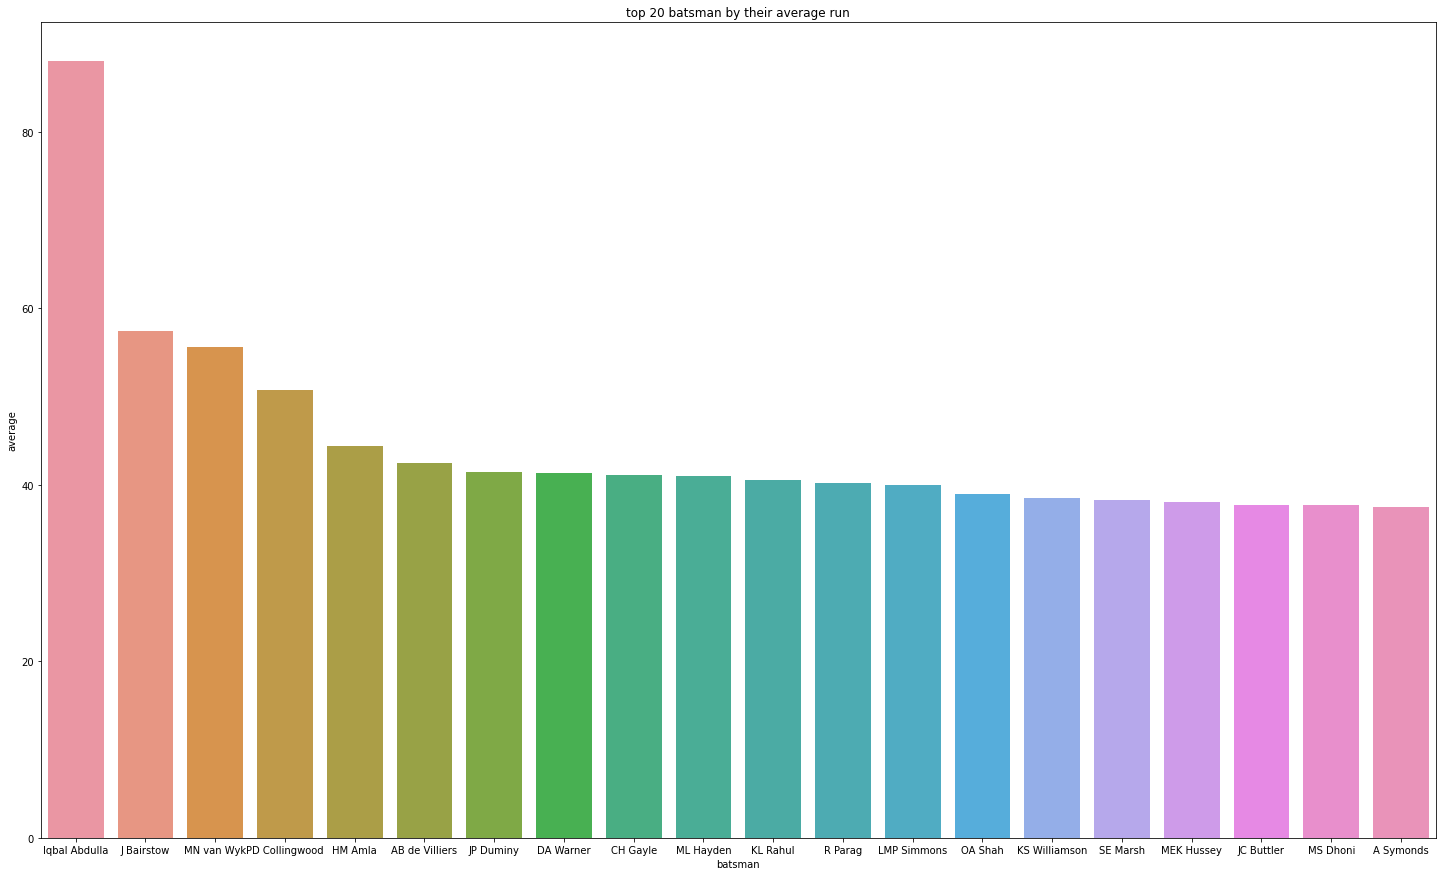

In [ ]:
plt.figure(figsize=(25,15))
plt.title('top 20 batsman by their average run')
sns.barplot(x = 'batsman', y = 'average', data = top_average_batsman[:20])

this graph shows that lqbal Abdulla have most average run in IPL,J Bairrstow have second most average run in IPL and MN van Wyk have third most average run in IPL

In [ ]:
top_strikerate_batsman=striker_df[['batsman','strikerate']]
top_strikerate_batsman.sort_values(by=['strikerate'], inplace=True,ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top_strikerate_batsman

,batsman,strikerate
443,B Stanlake,250.000000
449,KMDN Kulasekara,250.000000
301,Umar Gul,205.263158
462,VRV Singh,200.000000
461,RS Sodhi,200.000000
...,...,...
511,ND Doshi,0.000000
512,J Denly,0.000000
513,S Ladda,0.000000
514,V Pratap Singh,0.000000


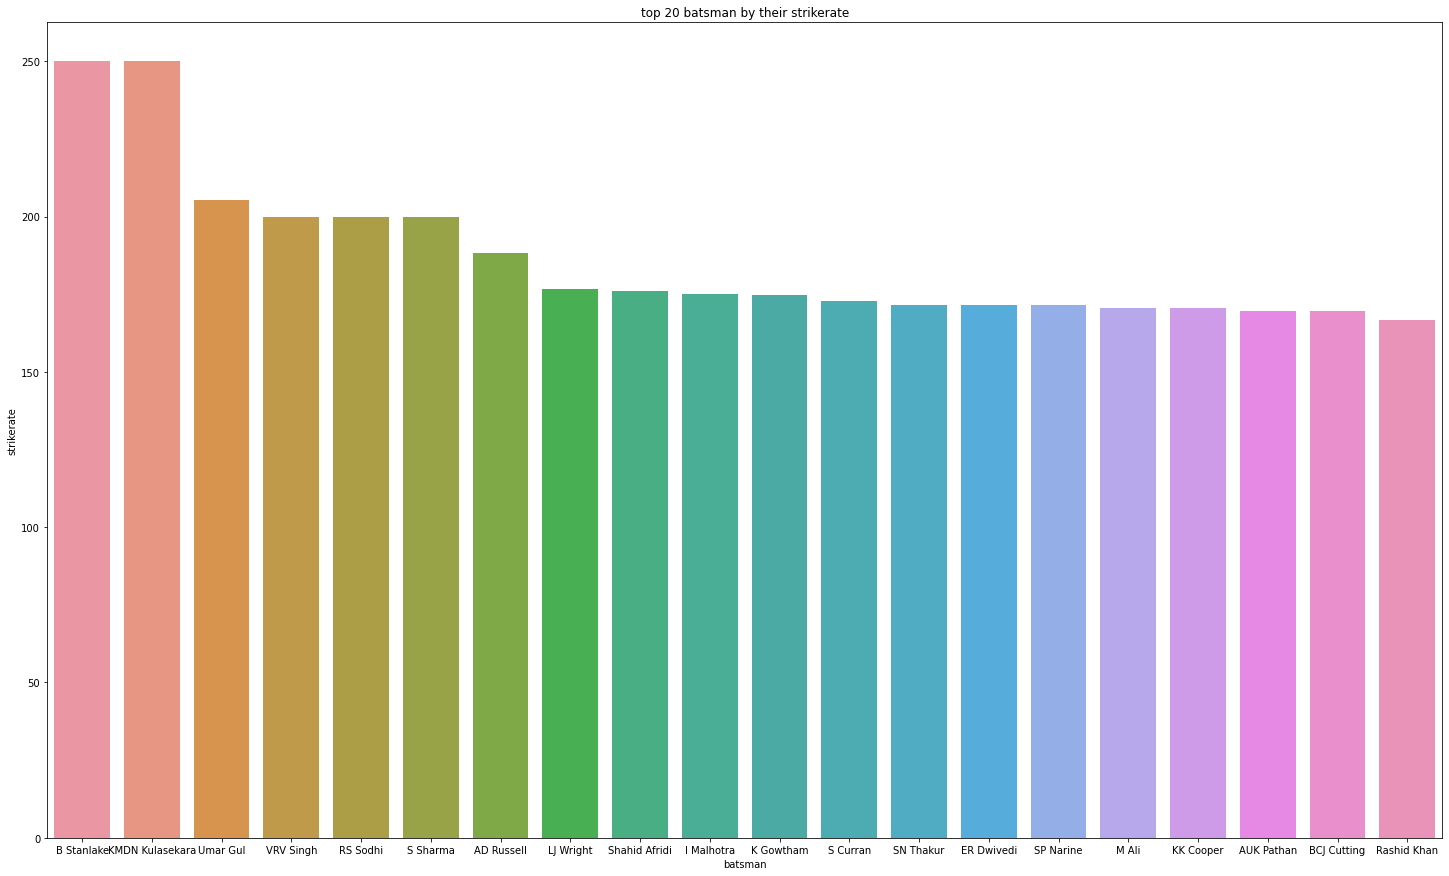

In [ ]:
plt.figure(figsize=(25,15))
plt.title('top 20 batsman by their strikerate')
sns.barplot(x = 'batsman', y = 'strikerate', data = top_strikerate_batsman[:20])

this graph shows that B Stanlake	and KMDN Kulasekara	 have maximun strickrate in Whole in IPL

In [ ]:
striker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        516 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


now all the null values in average column is replace by median

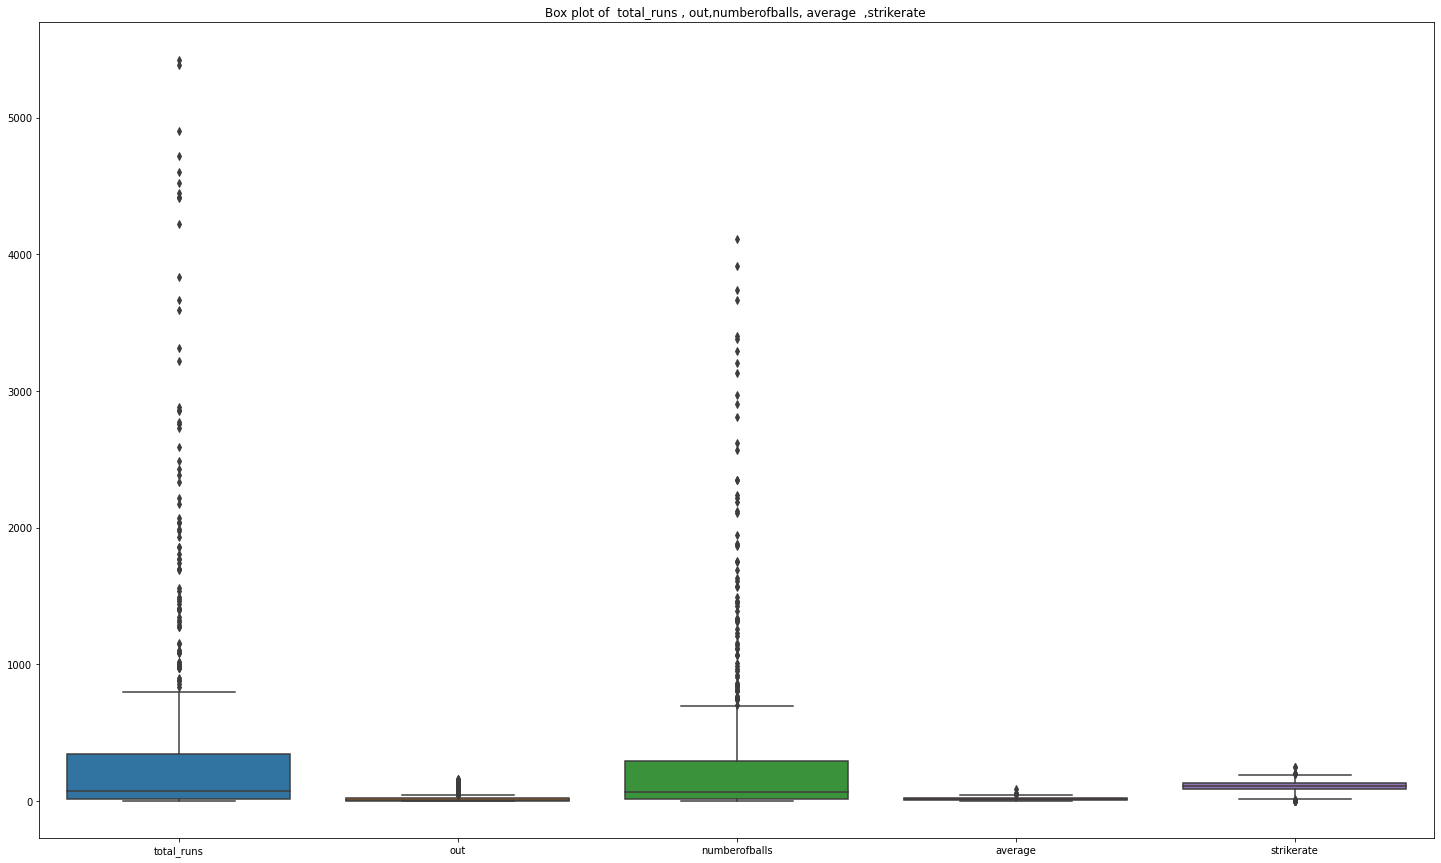

In [ ]:
plt.figure(figsize=(25,15))
plt.title("Box plot of  total_runs , out,numberofballs, average  ,strikerate ")
ax = sns.boxplot(data=striker_df, orient="v")


The above box plot shows that there are some outlier present in total_runs column,out column , numberofballs columns,average columns and strikerate columns .so we have to remove these outlier by finding IQR

#IQR=Q3-Q1

#lower_limit_outlier=Q1-1.5*IQR

#upper_limit_outlier=Q3+1.5*IQR

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier

#remove the outlier present in total_runs

In [ ]:
percentile_q1 = np.percentile(striker_df['total_runs'],25)
print(percentile_q1)
percentile_q2 = np.percentile(striker_df['total_runs'],50)
print(percentile_q2)
percentile_q3 = np.percentile(striker_df['total_runs'],75)
print(percentile_q3)

15.0
74.0
340.5


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -473.25
Upper limit for outlier  : 828.75


In [ ]:
striker_df=striker_df[striker_df['total_runs']>lower_limit_outlier]
striker_df=striker_df[striker_df['total_runs']<upper_limit_outlier]

In [ ]:
striker_df.shape

(436, 6)

#remove the outlier present in numberofballs


In [ ]:
percentile_q11 = np.percentile(striker_df['numberofballs'],25)
print(percentile_q11)
percentile_q22 = np.percentile(striker_df['numberofballs'],50)
print(percentile_q22)
percentile_q33 = np.percentile(striker_df['numberofballs'],75)
print(percentile_q33)

13.0
46.5
126.25


In [ ]:
iqr=percentile_q33 - percentile_q11
lower_limit_outlier=percentile_q11-1.5*iqr
upper_limit_outlier=percentile_q33+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -156.875
Upper limit for outlier  : 296.125


In [ ]:
striker_df=striker_df[striker_df['numberofballs']>lower_limit_outlier]
striker_df=striker_df[striker_df['numberofballs']<upper_limit_outlier]

In [ ]:
striker_df.shape

(388, 6)

#remove the outlier present in out  columns


In [ ]:
percentile_q1 = np.percentile(striker_df['out'],25)
print(percentile_q1)
percentile_q2 = np.percentile(striker_df['out'],50)
print(percentile_q2)
percentile_q3 = np.percentile(striker_df['out'],75)
print(percentile_q3)

1.0
3.0
7.0


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -8.0
Upper limit for outlier  : 16.0


In [ ]:
striker_df=striker_df[striker_df['out']>lower_limit_outlier]
striker_df=striker_df[striker_df['out']<upper_limit_outlier]

In [ ]:
striker_df.shape

(371, 6)


#remove the outlier present out average

In [ ]:
percentile_q1 = np.percentile(striker_df['average'],25)
print(percentile_q1)
percentile_q2 = np.percentile(striker_df['average'],50)
print(percentile_q2)
percentile_q3 = np.percentile(striker_df['average'],75)
print(percentile_q3)

6.733333333333334
11.666666666666664
16.0


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -7.166666666666664
Upper limit for outlier  : 29.9


In [ ]:
striker_df=striker_df[striker_df['average']>lower_limit_outlier]
striker_df=striker_df[striker_df['average']<upper_limit_outlier]

In [ ]:
striker_df.shape

(354, 6)


#remove the outlier present in strikerate

In [ ]:
percentile_q1 = np.percentile(striker_df['strikerate'],25)
print(percentile_q1)
percentile_q2 = np.percentile(striker_df['strikerate'],50)
print(percentile_q2)
percentile_q3 = np.percentile(striker_df['strikerate'],75)
print(percentile_q3)

70.73778664007978
98.46071872594874
119.41808191808192


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.282656276923447
Upper limit for outlier  : 192.43852483508516


In [ ]:
striker_df=striker_df[striker_df['strikerate']>lower_limit_outlier]
striker_df=striker_df[striker_df['strikerate']<upper_limit_outlier]

#After removal of   outlier

In [ ]:
striker_df.shape

(348, 6)

In [ ]:
striker_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
136,DB Das,304,12,260,25.333333,116.923077
137,C de Grandhomme,304,15,223,20.266667,136.322870
139,LA Pomersbach,302,11,244,27.454545,123.770492
142,DJG Sammy,295,15,241,19.666667,122.406639
143,Y Nagar,285,15,257,19.000000,110.894942


In [ ]:
striker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 136 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        348 non-null    object 
 1   total_runs     348 non-null    int64  
 2   out            348 non-null    int64  
 3   numberofballs  348 non-null    int64  
 4   average        348 non-null    float64
 5   strikerate     348 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.0+ KB


No null values in our data set

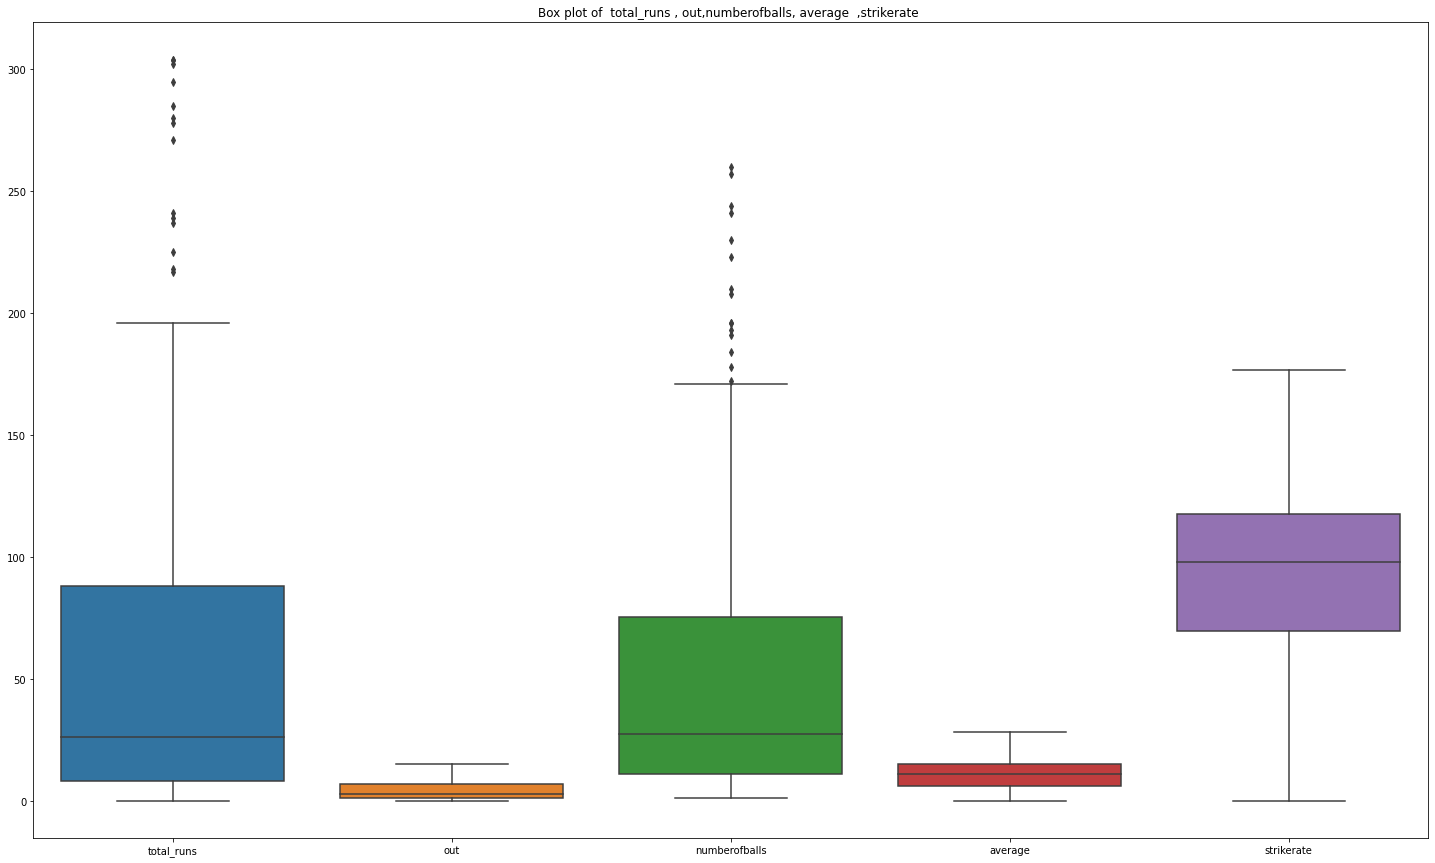

In [ ]:
plt.figure(figsize=(25,15))
plt.title("Box plot of  total_runs , out,numberofballs, average  ,strikerate ")
ax = sns.boxplot(data=striker_df, orient="v")

after removal of outlier boxplot is look like this .there is some outlier present in total_runs and numberofball column but out column ,average column and strikerate column are outlier free

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


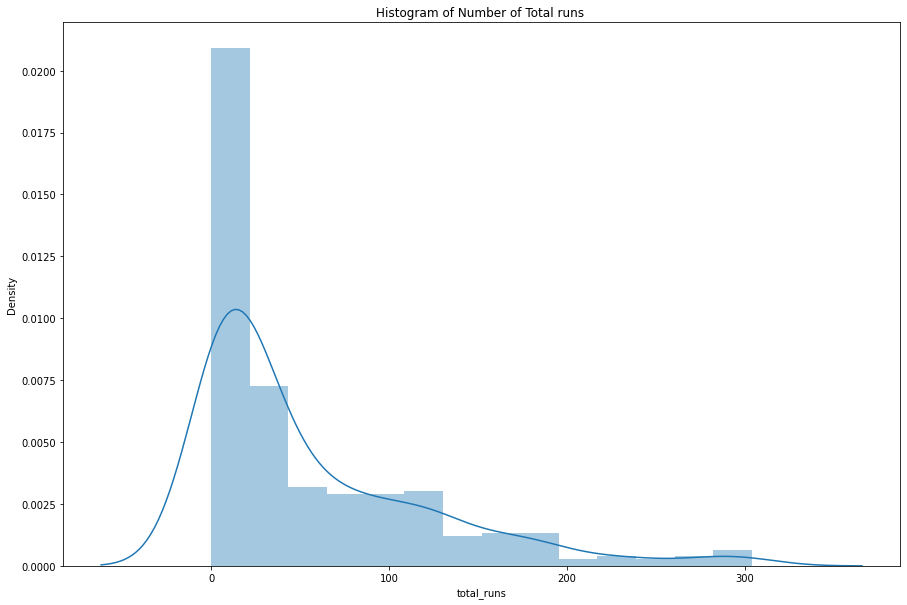

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Histogram of Number of Total runs ")
sns.distplot(striker_df['total_runs'], hist=True)

This graph looks likes positive skew distribution because most of values are lies in left part of our graph

positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.  hear mean>median>mode

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


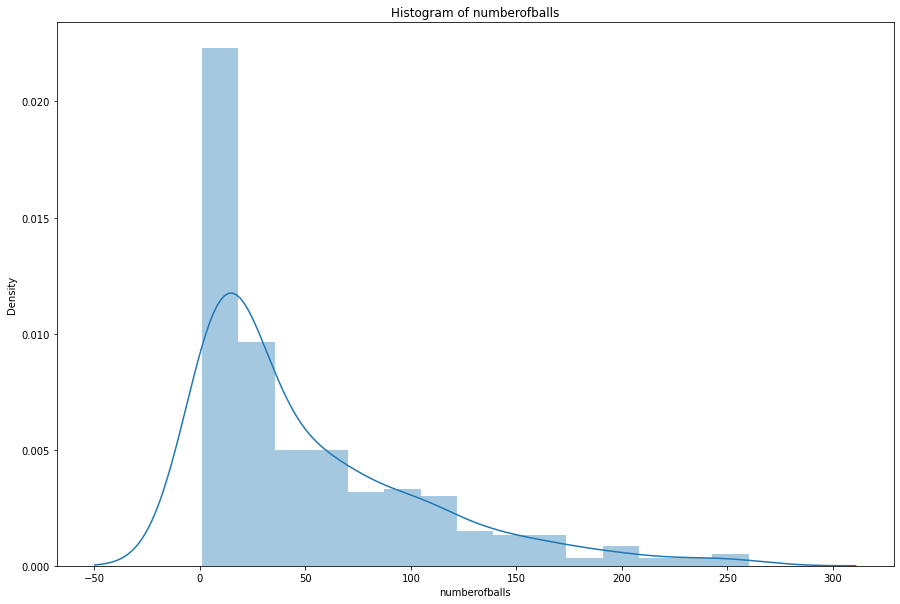

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Histogram of numberofballs")
sns.distplot(striker_df['numberofballs'], hist=True)

This graph looks likes positive skew distribution because most of data point are lies in left part of our graph

positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer. hear  mean > median > mode

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


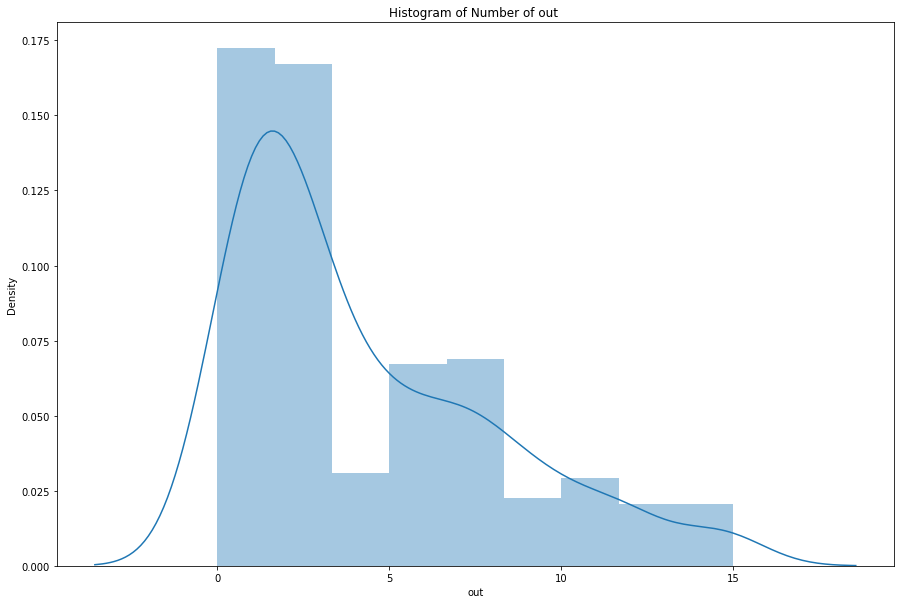

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Histogram of Number of out ")
sns.distplot(striker_df['out'], hist=True)

This graph looks likes positive skew distribution because most of data point are lies in left part of our graph

positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer. hear mean > median > mode

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


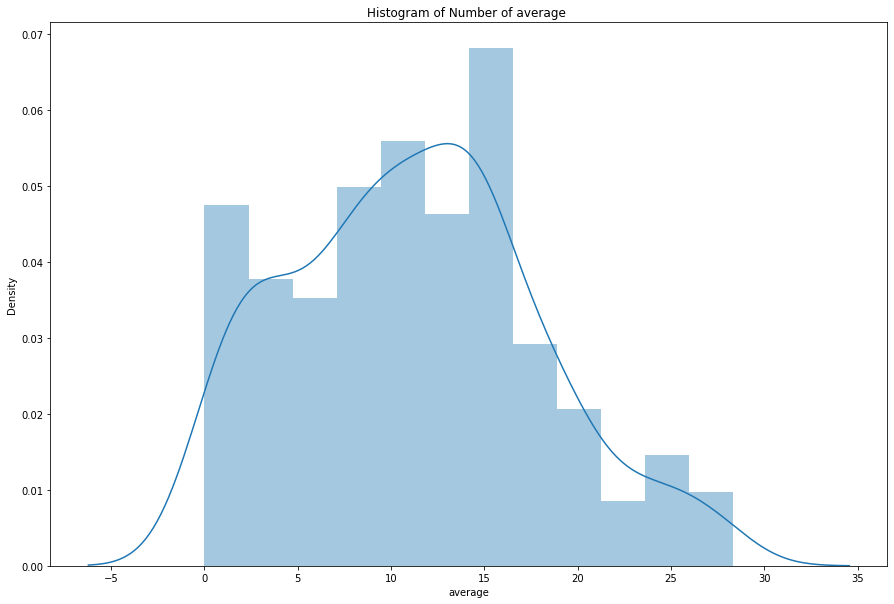

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Histogram of Number of average ")
sns.distplot(striker_df['average'], hist=True)

this graph is looks like symmetric curve

A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side. By definition, a symmetric distribution is never a skewed distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


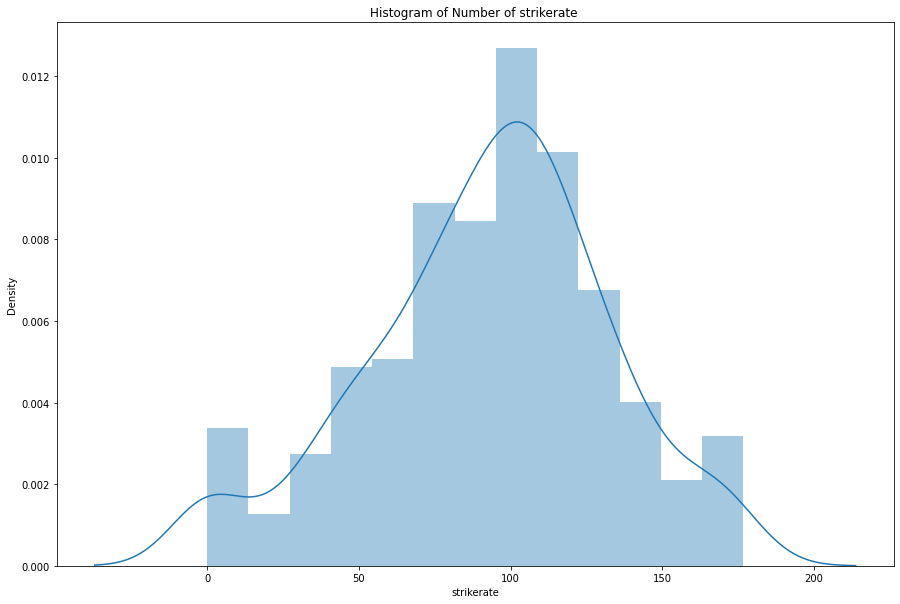

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Histogram of Number of strikerate ")
sns.distplot(striker_df['strikerate'], hist=True)

this graph is looks like symmetric curve

A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side. By definition, a symmetric distribution is never a skewed distribution

In [ ]:
striker_df_corr=striker_df.corr()


Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (e.g., height, weight)

it is 3 types

1.positive correlation   :A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

2.Negative correlation  : Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. In statistics, a perfect negative correlation is represented by the value -1

3.Zero correlation  :0 indicates no correlation 

In statistics, a perfect positive correlation is represented by the correlation coefficient value +1.0, while 0 indicates no correlation, and -1.0 indicates a perfect inverse (negative) correlation

In [ ]:
striker_df_corr

,total_runs,out,numberofballs,average,strikerate
total_runs,1.000000,0.840007,0.969946,0.643674,0.502032
out,0.840007,1.000000,0.865181,0.291712,0.382695
numberofballs,0.969946,0.865181,1.000000,0.593578,0.392213
average,0.643674,0.291712,0.593578,1.000000,0.604064
strikerate,0.502032,0.382695,0.392213,0.604064,1.000000


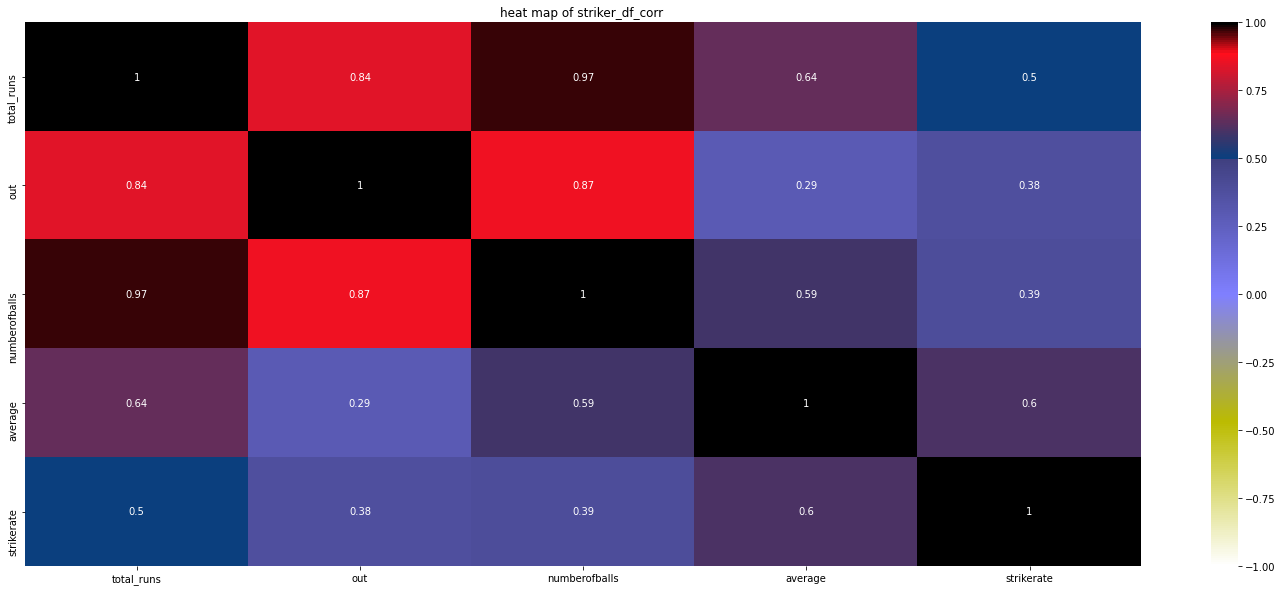

In [ ]:
plt.figure(figsize=(25,10))
plt.title('heat map of striker_df_corr ')
sns.heatmap(striker_df_corr,vmin=-1,cmap="gist_stern_r",annot=True)

# 4.DataSet: Players.xlsx

In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
player_df = pd.read_excel(working_directory + 'Players.xlsx')

In [ ]:
player_df.head(10)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
5,A Flintoff,1977-12-06,Right_Hand,Right-arm fast-medium,England
6,A Hales,NaT,Right_hand,NaN,NaN
7,A Joseph,NaT,Right_Hand,Right-arm fast,NaN
8,A Kumble,1970-10-17,Right_Hand,Legbreak googly,India
9,A Mishra,1982-11-24,Right_Hand,Legbreak,India


In [ ]:
player_df.shape

(566, 5)

this dataset conation 566 rows and 5 column .

1.Player_Name:name of the player 

2.DOB:date of birth of the player

3.Batting_Hand:the player batting in which hand in may be left hand or right hand 

4.Bowling_Skill:what type of bowler 

5.Country:country name of the player 

In [ ]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


this data set contain some null values 

In [ ]:
player_df['Batting_Hand'].value_counts()

Right_Hand    373
Left_Hand     142
Right_hand     48
Name: Batting_Hand, dtype: int64

In [ ]:
player_df['Batting_Hand']=player_df['Batting_Hand'].replace('Right_Hand','Right_hand')

In [ ]:
left_right_handed_df=player_df['Batting_Hand'].value_counts().reset_index()

In [ ]:
left_right_handed_df

,index,Batting_Hand
0,Right_hand,421
1,Left_Hand,142


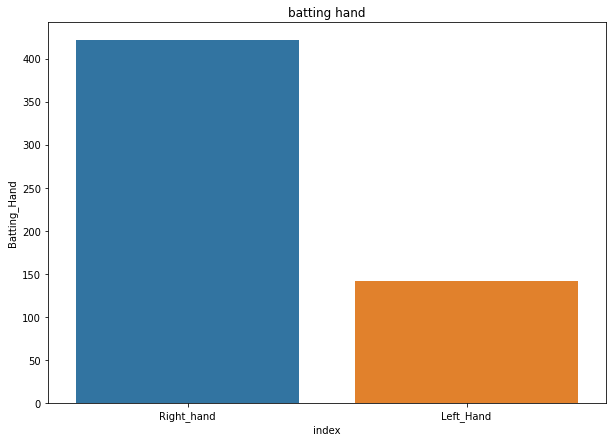

In [ ]:
plt.figure(figsize=(10,7))
plt.title('batting hand')
sns.barplot(x = 'index', y = 'Batting_Hand', data = left_right_handed_df) 

this graph shows that most of cricket batsman are Right hand and few are Left Hand

In [ ]:
bowling_skill_df=player_df['Bowling_Skill'].value_counts().reset_index()

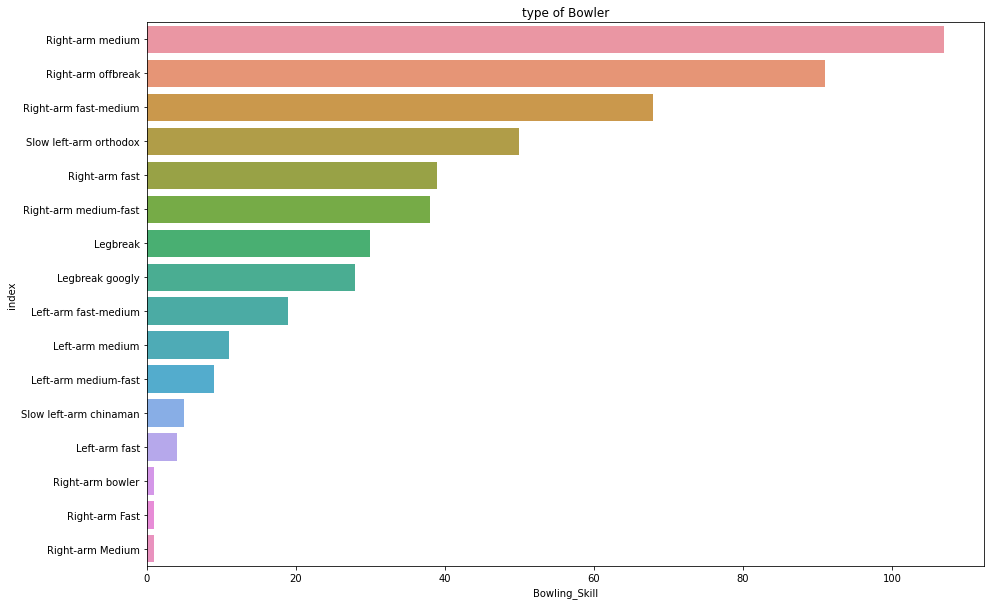

In [ ]:
plt.figure(figsize=(15,10))
plt.title('type of Bowler')
sns.barplot(x = 'Bowling_Skill', y = 'index', data = bowling_skill_df) 

this graph shows that most of the bowler are Right-arm medium ,second most number of the bowler are Right arm off break  and thire most number of bowler are Right arm fast medium 

this graph also shows that least number of bowler are right arm fast ,second least number of bowler are Right arm medium and third least number of batsman are Right arm bowler

In [ ]:
contry_df=player_df['Country'].value_counts().reset_index()

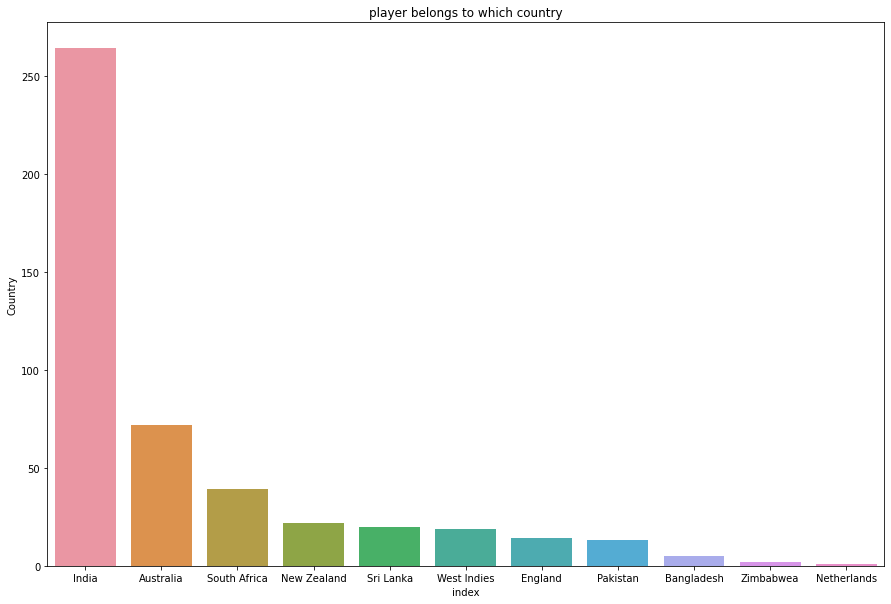

In [ ]:
plt.figure(figsize=(15,10))
plt.title('player belongs to which country')
sns.barplot(x = 'index', y = 'Country', data = contry_df)

this graph shows that most of the IPL plyer from india .and second most player  from Australia  and thied most player from South Africa

this graph also shows that few players of the IPL are belongs to Netherlands ,Zimbabwea and Bangladesh

In [ ]:
player_df.dropna(inplace=True)

In [ ]:
player_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_hand,Right-arm offbreak,India
5,A Flintoff,1977-12-06,Right_hand,Right-arm fast-medium,England
8,A Kumble,1970-10-17,Right_hand,Legbreak googly,India
...,...,...,...,...,...
560,YK Pathan,1982-11-17,Right_hand,Right-arm offbreak,India
561,Younis Khan,1977-11-29,Right_hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India


In [ ]:

d1 = datetime.datetime.today()
player_df['current_age'] = d1 - player_df['DOB']

In [ ]:
player_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,current_age
0,A Ashish Reddy,1991-02-24,Right_hand,Right-arm medium,India,10856 days 03:29:33.327689
1,A Chandila,1983-12-05,Right_hand,Right-arm offbreak,India,13494 days 03:29:33.327689
2,A Chopra,1977-09-19,Right_hand,Right-arm offbreak,India,15762 days 03:29:33.327689
5,A Flintoff,1977-12-06,Right_hand,Right-arm fast-medium,England,15684 days 03:29:33.327689
8,A Kumble,1970-10-17,Right_hand,Legbreak googly,India,18291 days 03:29:33.327689
...,...,...,...,...,...,...
560,YK Pathan,1982-11-17,Right_hand,Right-arm offbreak,India,13877 days 03:29:33.327689
561,Younis Khan,1977-11-29,Right_hand,Right-arm medium,Pakistan,15691 days 03:29:33.327689
562,YS Chahal,1990-07-23,Right_hand,Legbreak googly,India,11072 days 03:29:33.327689
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India,14217 days 03:29:33.327689


In [ ]:
from datetime import date, timedelta
d1 = datetime.datetime.today()
player_df['Age'] = (d1 - player_df['DOB']) // timedelta(days=365.2425)

In [ ]:
player_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,current_age,Age
0,A Ashish Reddy,1991-02-24,Right_hand,Right-arm medium,India,10856 days 03:29:33.327689,29
1,A Chandila,1983-12-05,Right_hand,Right-arm offbreak,India,13494 days 03:29:33.327689,36
2,A Chopra,1977-09-19,Right_hand,Right-arm offbreak,India,15762 days 03:29:33.327689,43
5,A Flintoff,1977-12-06,Right_hand,Right-arm fast-medium,England,15684 days 03:29:33.327689,42
8,A Kumble,1970-10-17,Right_hand,Legbreak googly,India,18291 days 03:29:33.327689,50
...,...,...,...,...,...,...,...
560,YK Pathan,1982-11-17,Right_hand,Right-arm offbreak,India,13877 days 03:29:33.327689,37
561,Younis Khan,1977-11-29,Right_hand,Right-arm medium,Pakistan,15691 days 03:29:33.327689,42
562,YS Chahal,1990-07-23,Right_hand,Legbreak googly,India,11072 days 03:29:33.327689,30
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India,14217 days 03:29:33.327689,38


In [ ]:
p_df=player_df['Age'].value_counts().reset_index()

In [ ]:
p_df

,index,Age
0,36,35
1,35,32
2,30,31
3,33,31
4,37,30
5,39,28
6,31,28
7,32,22
8,38,21
9,34,19


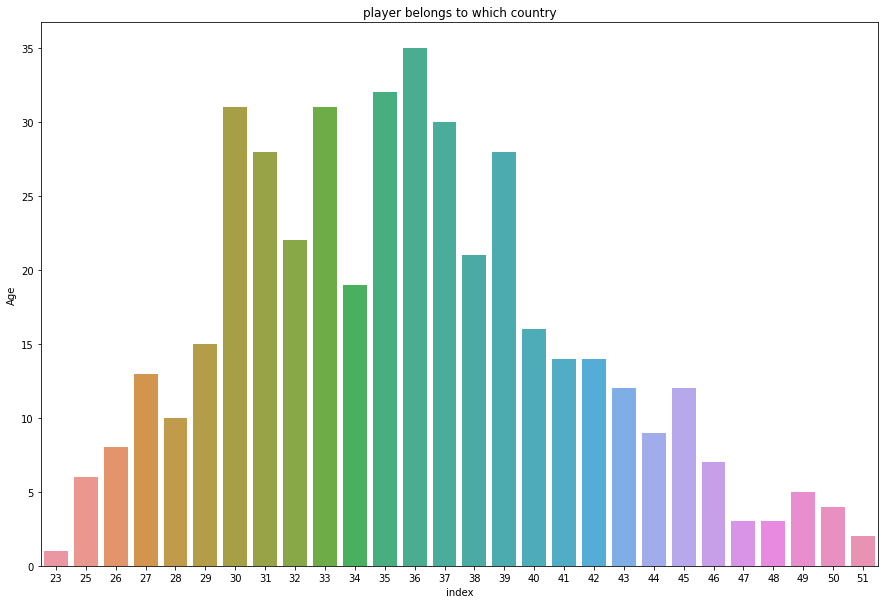

In [ ]:
plt.figure(figsize=(15,10))
plt.title('player belongs to which country')
sns.barplot(x = 'index', y = 'Age', data = p_df)

this graph shows that most of the cricket player have age 35
there are very less player whose age is less then 23 year and greater than 50 years

# 5.DataSet:  teamwise_home_and_away.csv

In [ ]:
#load the data set
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
home_df = pd.read_csv(working_directory + 'teamwise_home_and_away.csv')

In [ ]:
home_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [ ]:
home_df.shape

(14, 7)

this data set contain 14 rows and 7 columns .each rows corresponds to one unique team  and each column coresponds to 


1.team: name of the team

2.home_wins: How many match they win by their home ground 

3.away_wins: how many match they win apart from home ground 

4.home_matches:number of matches playing in their home ground 

5.away_matches:number of matches playing outside of their  home ground 

6.home_win_percentage	:(home_wins*100)/home_matches

7.away_win_percentage: (away_wins*100)/away_matches

In [ ]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


data set do not contain any null values

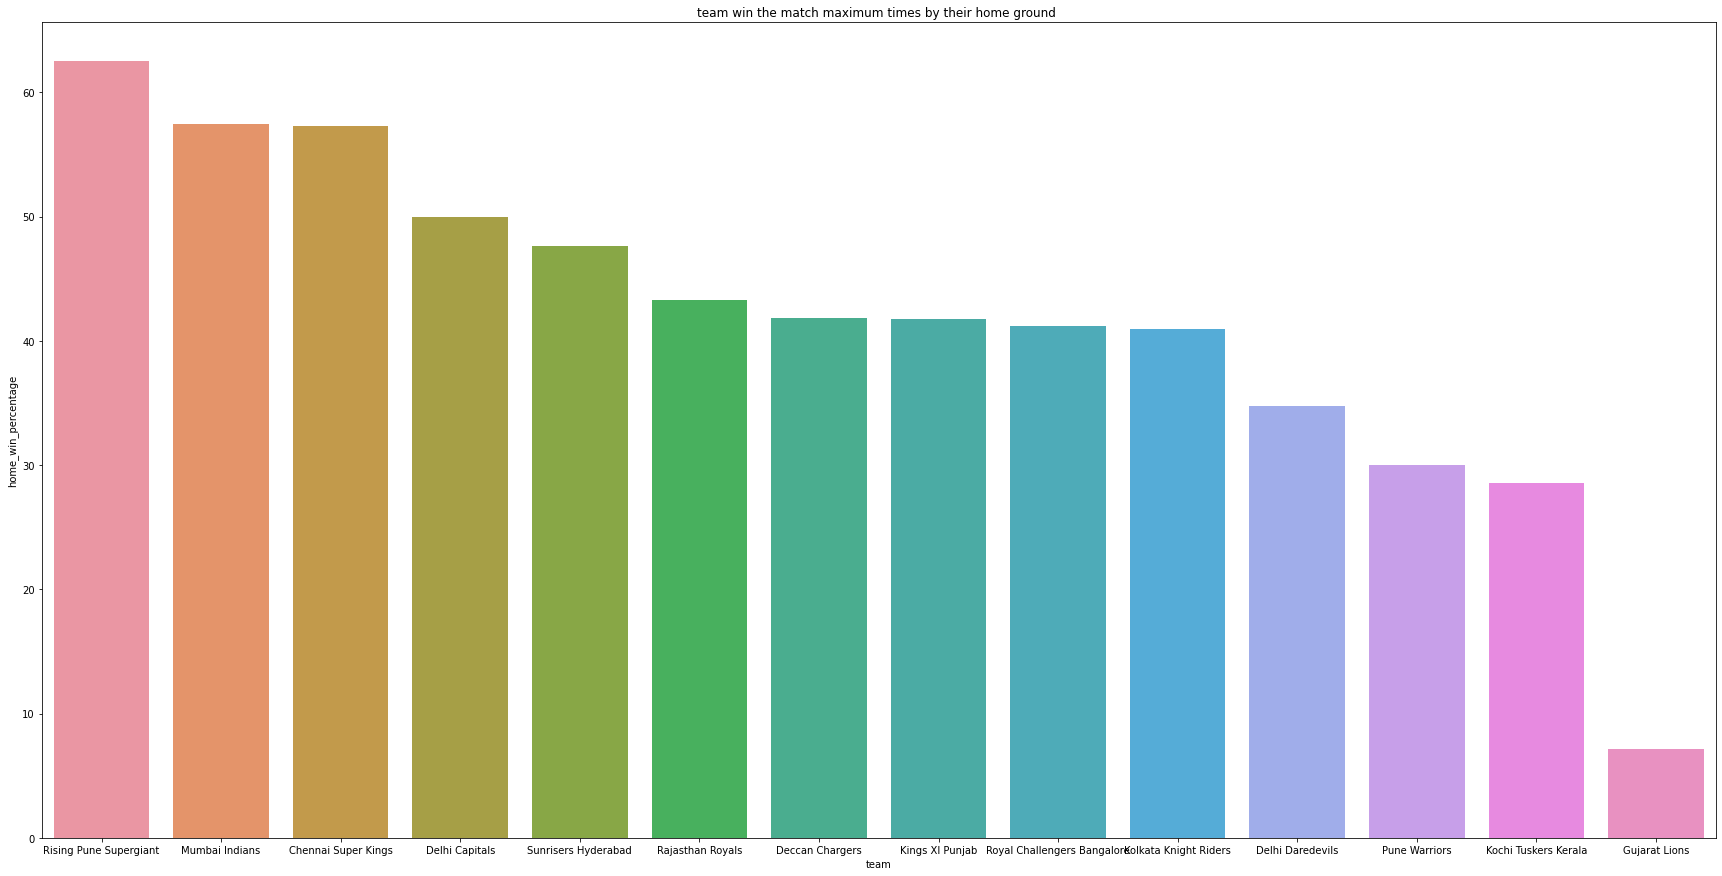

In [ ]:
plt.figure(figsize=(30,15))
plt.title("team win the match maximum times by their home ground ")
sns.barplot(x = 'team', y = 'home_win_percentage', data = home_df)

this graph  shows that team Rising Pune Supergiant	win  the match maximun times in their home ground ,team Mumbai Indians win the match second most number of times in their home ground and team Channai Super Kinds win the match third most number of times in their home ground 

this graph also shows that Gujarat Lions win the match least number of times in their home ground ,Kochi Tuskers Kerala won the match second least number of times on their home ground  and Pune Warriors win the match 3rd least number of times in their home ground 

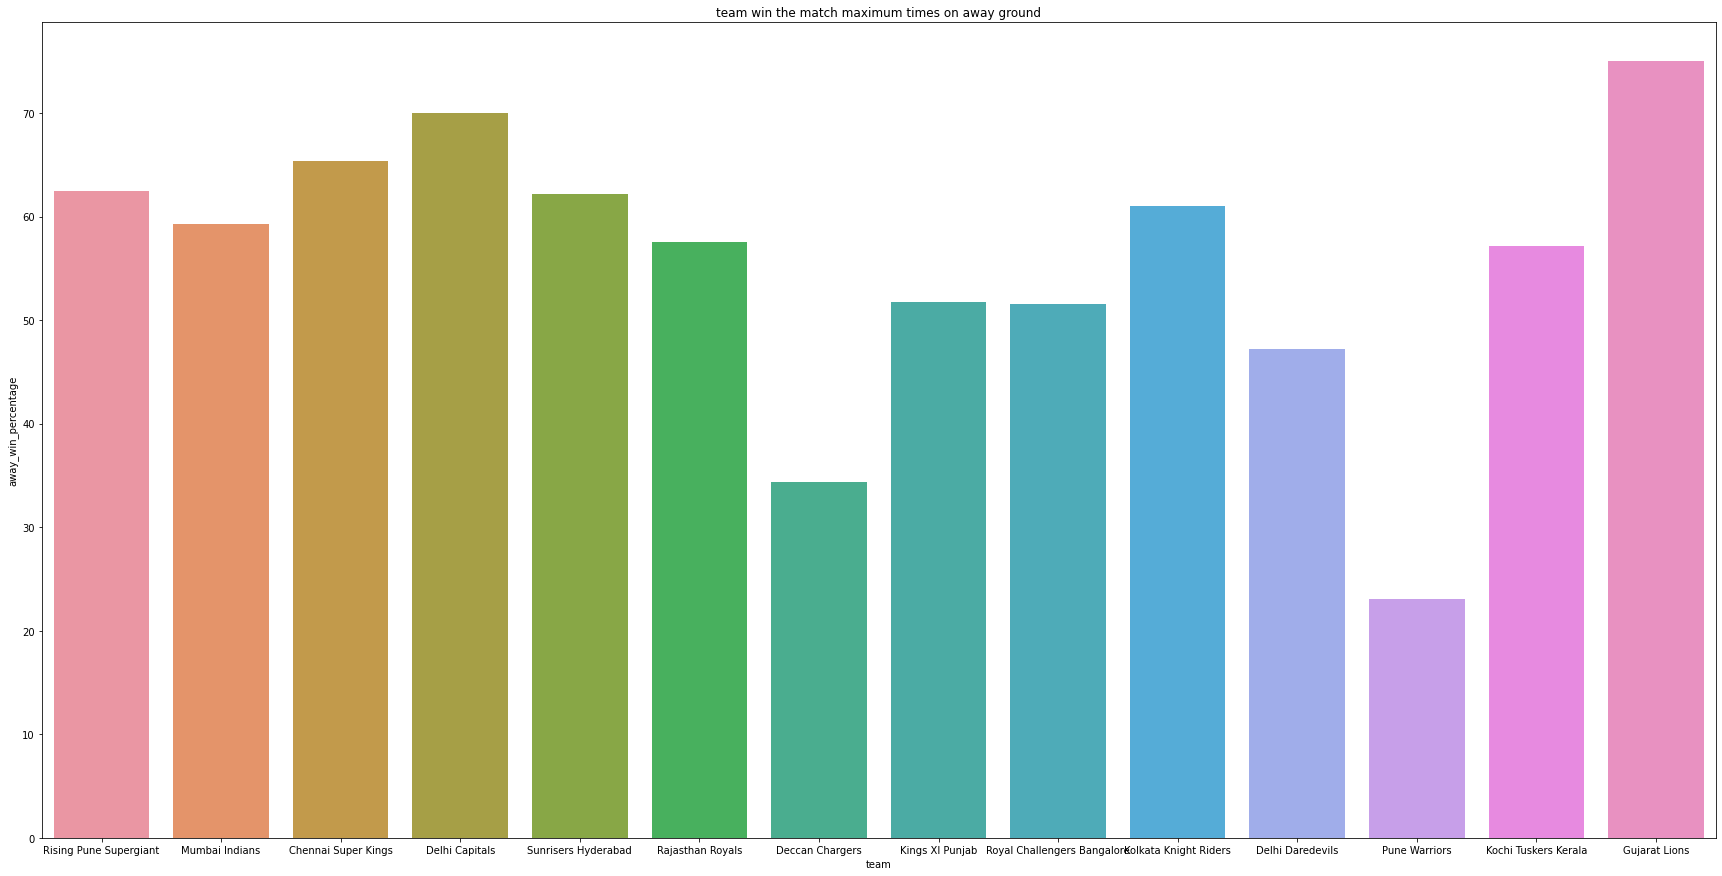

In [ ]:
plt.figure(figsize=(30,15))
plt.title('team win the match maximum times on away ground')
sns.barplot(x = 'team', y = 'away_win_percentage', data = home_df)

this graph shows that Gujarat Lions win the match maximun number of times in away ground ,Delhi Capital win the match second most times in away ground and chennai Super king won the match third most number of times in away ground 

this graph also shows that pune Warriors won the match least number of times in away ground  ,Deccan Chargers  win the match second least number of times on the away ground and Delhi Daredevills win the third least number of times on away ground 

In [ ]:
home_df['average_win_percentage']=(home_df['home_wins']+home_df['away_wins'])*100/(home_df['home_matches']+home_df['away_matches'])

In [ ]:
home_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,average_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326,58.288770
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333,60.975610
3,Delhi Capitals,3,7,6,10,50.000000,70.000000,62.500000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222,53.703704
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000,51.020408
6,Deccan Chargers,18,11,43,32,41.860465,34.375000,38.666667
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706,46.590909
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947,46.666667
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632,51.685393


In [ ]:
home_df_corr=home_df.corr()

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (e.g., height, weight)

it is 3 types

1.positive correlation   :A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

2.Negative correlation  : Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. In statistics, a perfect negative correlation is represented by the value -1

3.Zero correlation  :0 indicates no correlation 

In statistics, a perfect positive correlation is represented by the correlation coefficient value +1.0, while 0 indicates no correlation, and -1.0 indicates a perfect inverse (negative) correlation

In [ ]:
home_df_corr

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,average_win_percentage
home_wins,1.000000,0.886244,0.958743,0.849240,0.497658,0.055775,0.332829
away_wins,0.886244,1.000000,0.948420,0.972108,0.277170,0.133031,0.254792
home_matches,0.958743,0.948420,1.000000,0.950332,0.341030,-0.028096,0.175607
away_matches,0.849240,0.972108,0.950332,1.000000,0.221629,-0.066670,0.082442
home_win_percentage,0.497658,0.277170,0.341030,0.221629,1.000000,0.103141,0.711389
away_win_percentage,0.055775,0.133031,-0.028096,-0.066670,0.103141,1.000000,0.768113
average_win_percentage,0.332829,0.254792,0.175607,0.082442,0.711389,0.768113,1.000000


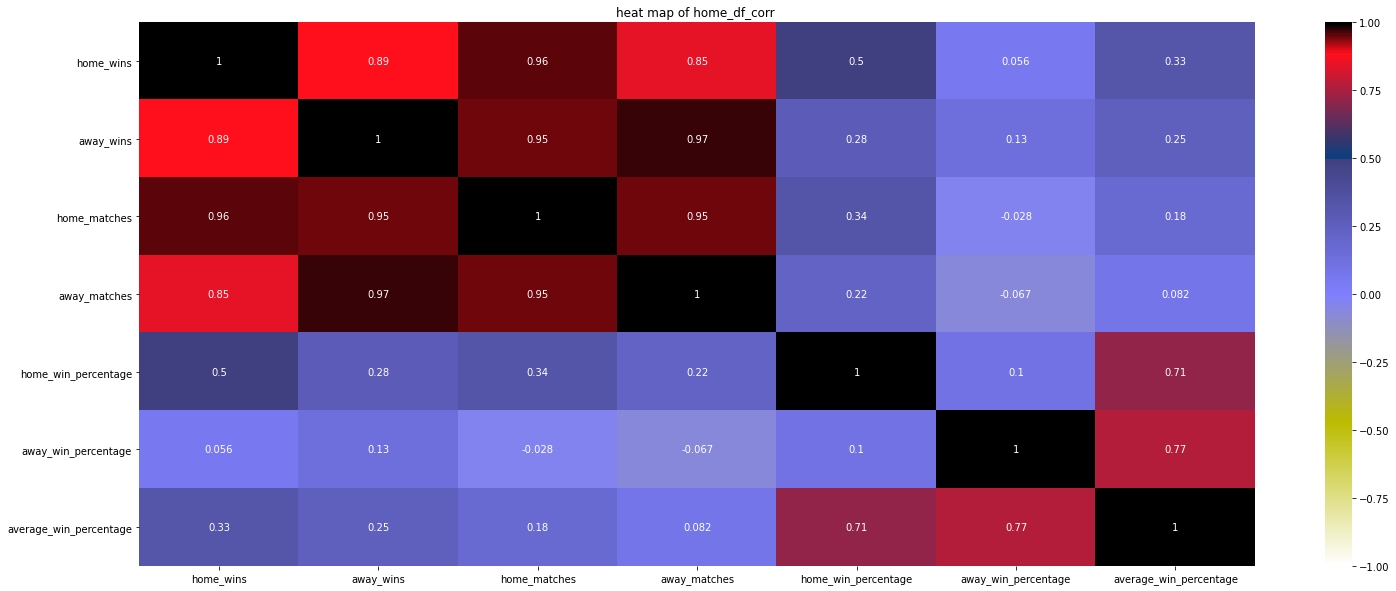

In [ ]:
plt.figure(figsize=(25,10))
plt.title('heat map of home_df_corr ')
sns.heatmap(home_df_corr,vmin=-1,cmap="gist_stern_r",annot=True)

# 6.DataSet:deliveries.csv

In [363]:
#load the data   
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
deliveries_df = pd.read_csv(working_directory + 'deliveries.csv')

In [364]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries_df.shape

(179078, 21)

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [365]:
batsman_run_df=deliveries_df.groupby('batsman')['batsman_runs'].sum().reset_index()
batsman_run_df.sort_values(by='batsman_runs',inplace=True,ascending=False)

In [366]:
batsman_run_df

,batsman,batsman_runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
...,...,...
172,IC Pandey,0
182,J Denly,0
326,P Raj,0
463,Sunny Gupta,0


In [ ]:
batsman_run_df.tail(10)

,batsman,batsman_runs
399,S Ladda,0
480,U Kaul,0
487,V Pratap Singh,0
87,C Nanda,0
308,ND Doshi,0
172,IC Pandey,0
182,J Denly,0
326,P Raj,0
463,Sunny Gupta,0
235,L Ablish,0


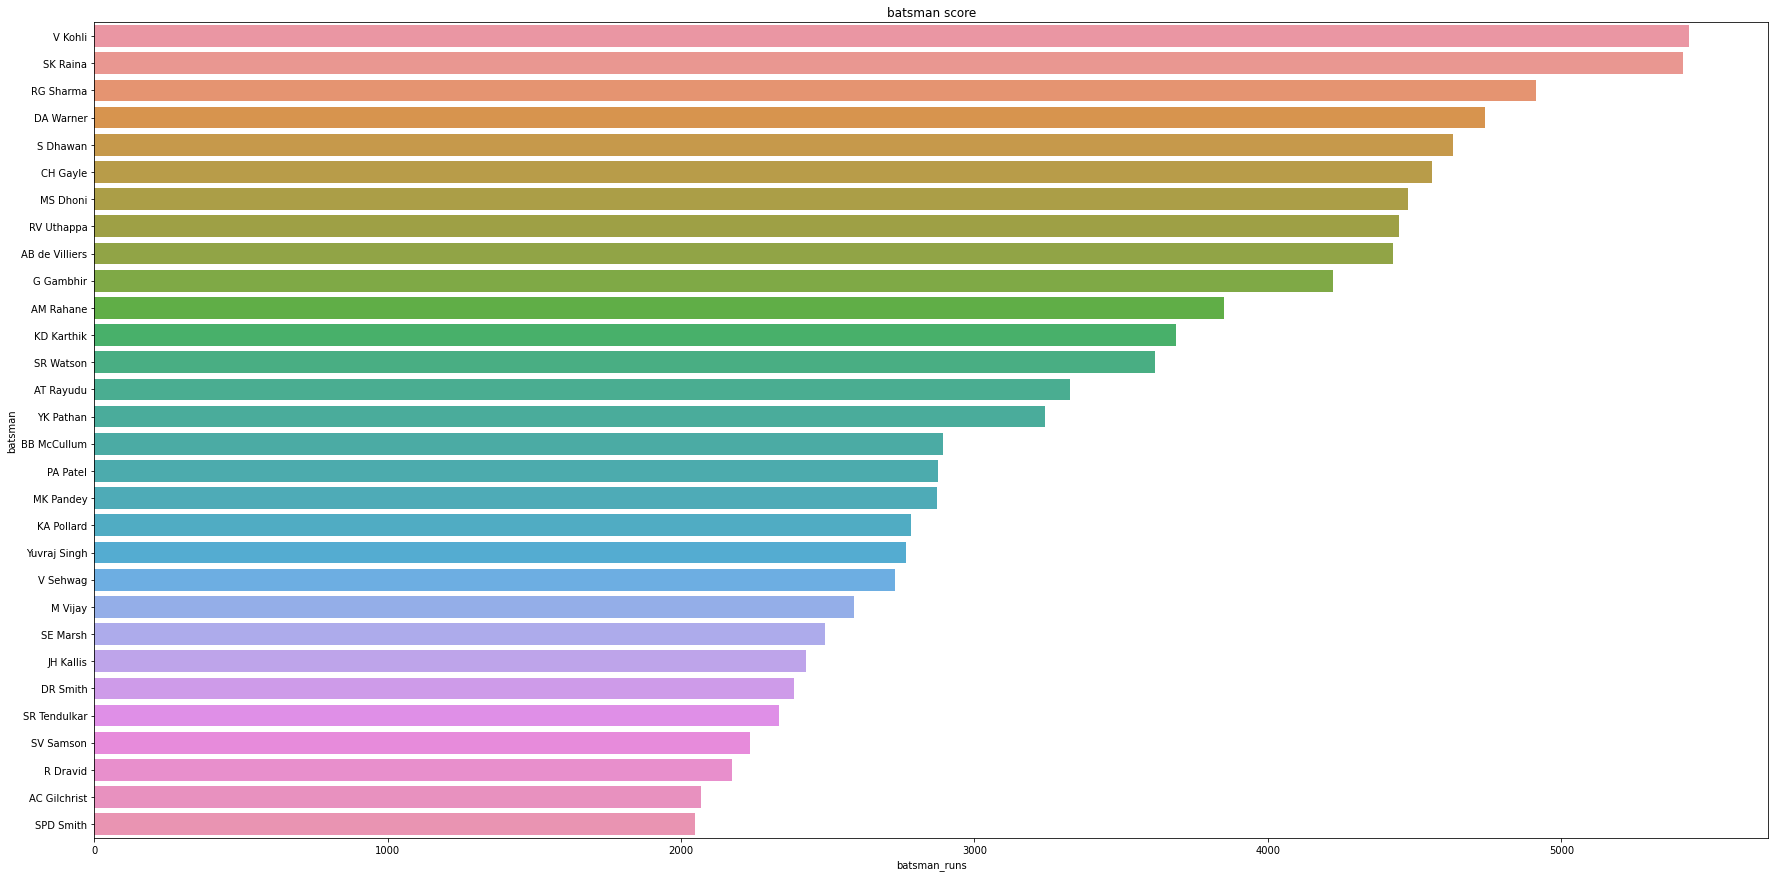

In [ ]:
plt.figure(figsize=(30,15))
plt.title('batsman score')
sns.barplot(x = 'batsman_runs', y = 'batsman', data = batsman_run_df[:30])

this graph shows that V Kohli score maximum runs in IPL,SK Raina scored second most runs in IPL,RG Sharma scored third most runs in IPL

this graph also shows that SPD Smith scored least numbers of runs in IPL ,AC Gilchrist scored second least in IPL and R Dravid Scored third least runs in IPL

In [ ]:
bowler_extra_run_df=deliveries_df.groupby('bowler')['extra_runs'].sum().reset_index()
bowler_extra_run_df.sort_values(by='extra_runs',inplace=True,ascending=False)

In [ ]:
bowler_extra_run_df

,bowler,extra_runs
340,SL Malinga,293
251,P Kumar,236
381,UT Yadav,219
93,DJ Bravo,201
53,B Kumar,197
...,...,...
23,AC Gilchrist,0
254,P Prasanth,0
77,CJ McKay,0
327,SA Yadav,0


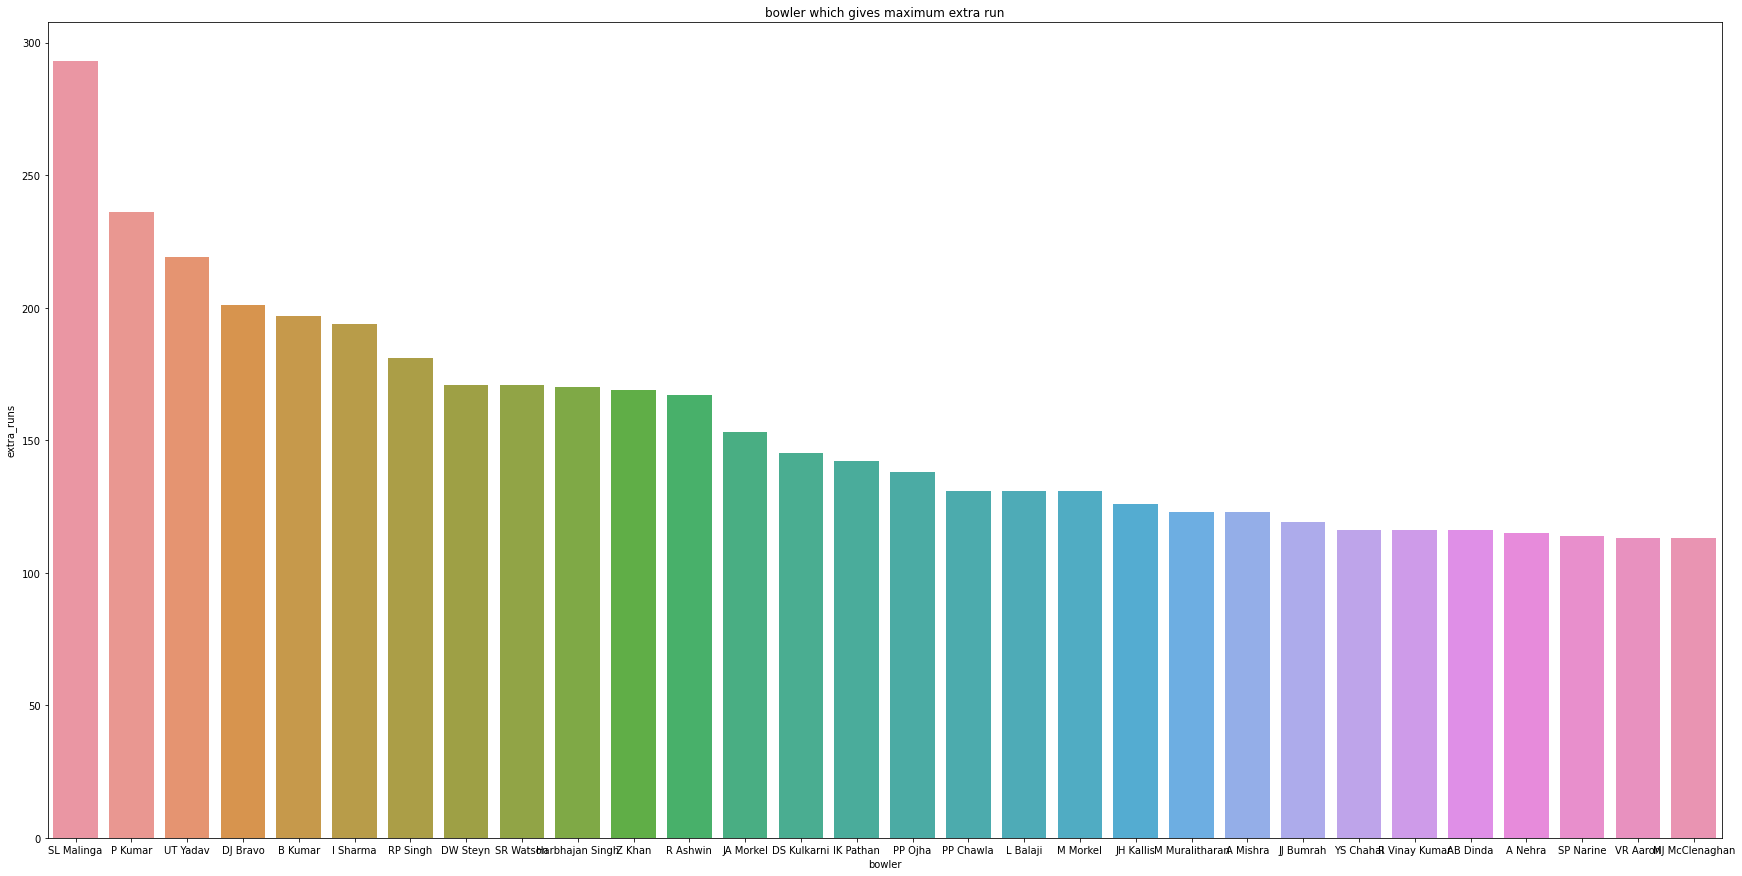

In [ ]:
plt.figure(figsize=(30,15))
plt.title('bowler which gives maximum extra run')
sns.barplot(x = 'bowler', y = 'extra_runs', data = bowler_extra_run_df[:30])

this graph shows that SL Malinga give maximum extra run ,P Kumar gives second most maximum extra run and UT Yadav gives third most maximum extra run

In [ ]:
deliveries_df['inning'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
deliveries_df['is_super_over'].unique()

array([0, 1])

In [ ]:
deliveries_df['is_super_over'].count()

179078

In [ ]:
non_striker_df=deliveries_df['non_striker'].value_counts().reset_index()
non_striker_df

,index,non_striker
0,SK Raina,4173
1,S Dhawan,4090
2,V Kohli,4071
3,RG Sharma,3858
4,G Gambhir,3740
...,...,...
506,R Salam,2
507,PM Sarvesh Kumar,1
508,BW Hilfenhaus,1
509,TP Sudhindra,1


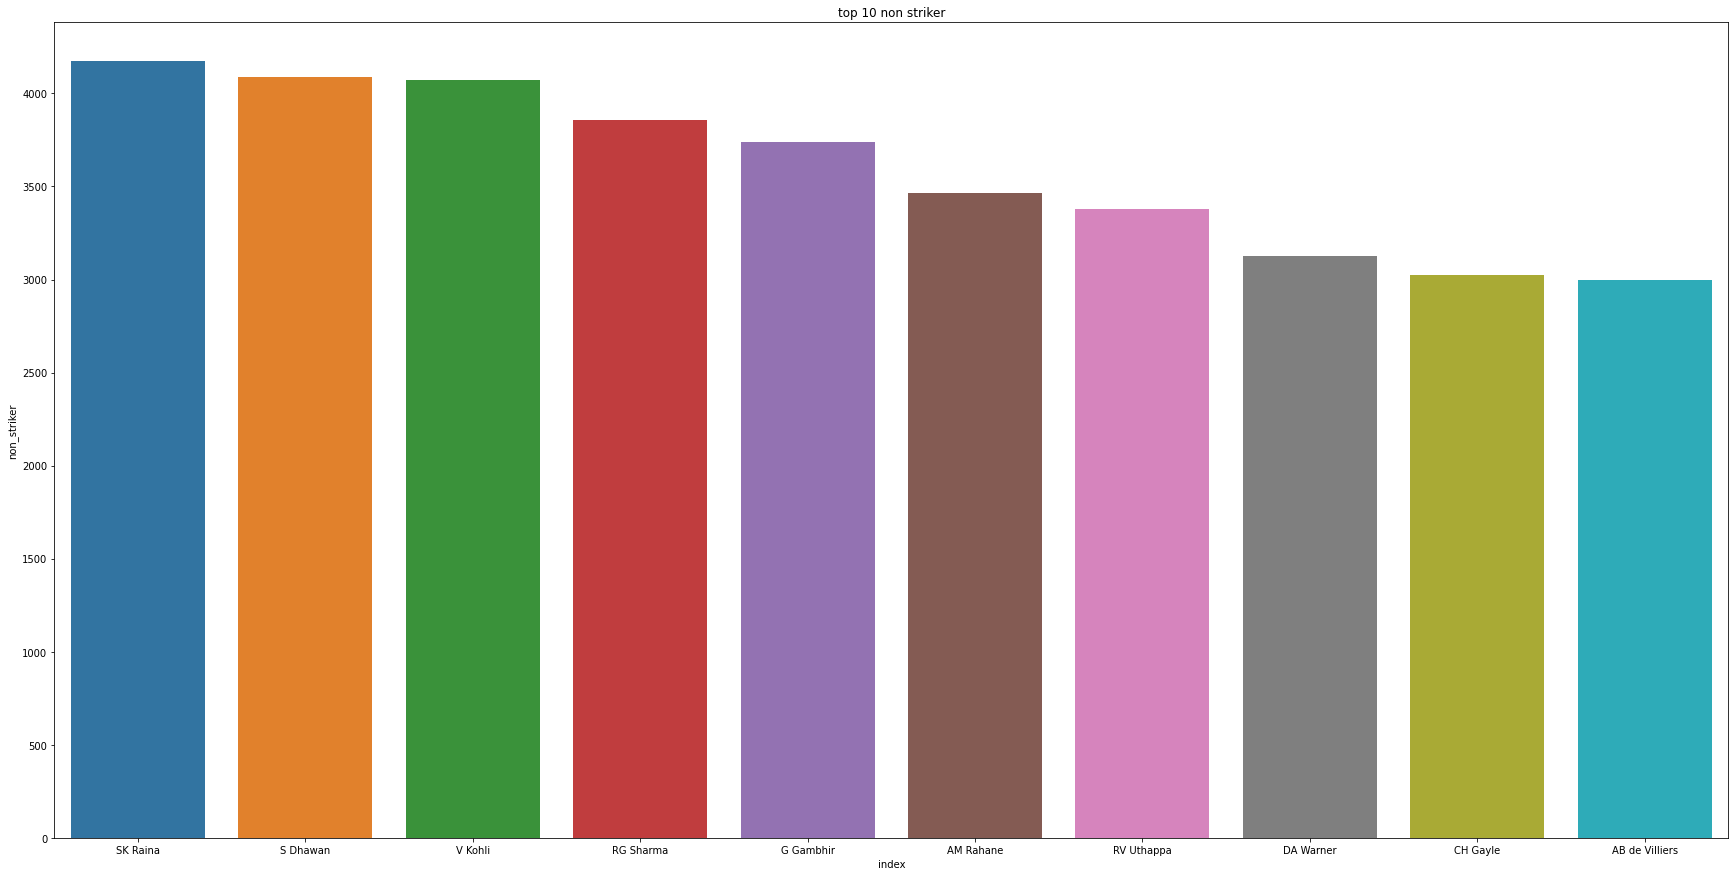

In [ ]:
plt.figure(figsize=(30,15))
plt.title('top 10 non striker')
sns.barplot(x = 'index', y = 'non_striker', data = non_striker_df[:10])

this graph shows SK Raina is non-stricker in  most of the time ,S Dhawan  is non-stricker in second most times and V Kohli is 3rd most non-stricker 

In [ ]:
deliveries_df['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

name of the all unique batsman in IPL is

'DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woakes', 'SP Narine', 'Harbhajan Singh', 'AB de Villiers',
       'CJ Anderson', 'F du Plessis', 'RA Tripathi', 'R Bhatia',
       'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir', 'NV Ojha',
       'V Shankar', 'Rashid Khan', 'B Kumar', 'MP Stoinis', 'MM Sharma',
       'VR Aaron', 'V Kohli', 'MJ McClenaghan', 'Ankit Sharma',
       'SN Thakur', 'RD Chahar', 'LH Ferguson', 'C de Grandhomme',
       'Bipul Sharma', 'SS Iyer', 'EJG Morgan', 'KC Cariappa',
       'Sandeep Sharma', 'Ishan Kishan', 'JD Unadkat', 'AF Milne',
       'S Badree', 'AD Mathews', 'Mohammed Shami', 'Mohammad Nabi',
       'I Sharma', 'RA Jadeja', 'AJ Tye', 'KS Williamson', 'SE Marsh',
       'Shakib Al Hasan', 'JP Faulkner', 'MG Johnson', 'K Rabada',
       'AD Nath', 'NM Coulter-Nile', 'Kuldeep Yadav', 'UT Yadav',
       'Washington Sundar', 'KV Sharma', 'DM Bravo', 'AR Bawne',
       'SP Jackson', 'MJ Guptill', 'Anureet Singh', 'IK Pathan',
       'Ankit Soni', 'JJ Bumrah', 'SL Malinga', 'PJ Sangwan', 'S Kaul',
       'LMP Simmons', 'MN Samuels', 'Swapnil Singh', 'R Tewatia',
       'MM Patel', 'SS Tiwary', 'TA Boult', 'CJ Jordan', 'IR Jaggi',
       'PP Chawla', 'AS Rajpoot', 'SC Ganguly', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'JH Kallis', 'CL White',
       'MV Boucher', 'B Akhil', 'AA Noffke', 'SB Joshi', 'ML Hayden',
       'MEK Hussey', 'JDP Oram', 'S Badrinath', 'K Goel', 'JR Hopes',
       'KC Sangakkara', 'SM Katich', 'T Kohli', 'M Kaif', 'DS Lehmann',
       'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'V Sehwag',
       'L Ronchi', 'ST Jayasuriya', 'DJ Thornely', 'PR Shah', 'AM Nayar',
       'SM Pollock', 'S Chanderpaul', 'LRPL Taylor', 'AC Gilchrist',
       'Y Venugopal Rao', 'VVS Laxman', 'A Symonds', 'SB Styris',
       'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'WA Mota', 'Kamran Akmal',
       'Shahid Afridi', 'DJ Bravo', 'MA Khote', 'A Nehra', 'GC Smith',
       'Pankaj Singh', 'RR Sarwan', 'S Sreesanth', 'VRV Singh',
       'R Vinay Kumar', 'AB Agarkar', 'M Kartik', 'Shoaib Malik',
       'MF Maharoof', 'VY Mahesh', 'TM Srivastava', 'B Chipli',
       'DW Steyn', 'DB Das', 'HH Gibbs', 'DNT Zoysa', 'D Kalyankrishna',
       'SA Asnodkar', 'Sohail Tanvir', 'Salman Butt', 'BJ Hodge',
       'Umar Gul', 'SP Fleming', 'S Vidyut', 'JA Morkel', 'LPC Silva',
       'DB Ravi Teja', 'Misbah-ul-Haq', 'YV Takawale', 'RR Raje',
       'Mohammad Asif', 'GD McGrath', 'Joginder Sharma', 'MS Gony',
       'M Muralitharan', 'M Ntini', 'DT Patil', 'A Kumble', 'S Anirudha',
       'CK Kapugedera', 'A Chopra', 'T Taibu', 'J Arunkumar', 'PP Ojha',
       'SP Goswami', 'SR Tendulkar', 'U Kaul', 'TM Dilshan',
       'AD Mascarenhas', 'Niraj Patel', 'LA Pomersbach', 'Younis Khan',
       'PM Sarvesh Kumar', 'DP Vijaykumar', 'Shoaib Akhtar',
       'Abdur Razzak', 'H Das', 'SD Chitnis', 'CRD Fernando',
       'VS Yeligati', 'L Balaji', 'A Mukund', 'RR Powar', 'JP Duminy',
       'A Flintoff', 'T Thushara', 'JD Ryder', 'KP Pietersen',
       'T Henderson', 'Kamran Khan', 'RS Bopara', 'R Bishnoi',
       'FH Edwards', 'PC Valthaty', 'RJ Quiney', 'AS Raut',
       'Yashpal Singh', 'M Manhas', 'AA Bilakhia', 'AN Ghosh',
       'BAW Mendis', 'DL Vettori', 'MN van Wyk', 'RE van der Merwe',
       'TL Suman', 'Shoaib Ahmed', 'GR Napier', 'KP Appanna',
       'LA Carseldine', 'SM Harwood', 'M Vijay', 'SB Jakati', 'RJ Harris',
       'D du Preez', 'M Morkel', 'J Botha', 'C Nanda', 'Mashrafe Mortaza',
       'A Singh', 'GJ Bailey', 'AB McDonald', 'Y Nagar', 'SS Shaikh',
       'R Ashwin', 'Mohammad Ashraful', 'CA Pujara', 'OA Shah',
       'Anirudh Singh', 'Jaskaran Singh', 'R Sathish', 'R McLaren',
       'AA Jhunjhunwala', 'P Dogra', 'A Uniyal', 'MS Bisla', 'YA Abdulla',
       'JM Kemp', 'S Tyagi', 'RS Gavaskar', 'SE Bond', 'S Ladda',
       'DP Nannes', 'MJ Lumb', 'DR Martyn', 'S Narwal', 'AB Barath',
       'FY Fazal', 'AC Voges', 'MD Mishra', 'J Theron', 'SJ Srivastava',
       'R Sharma', 'SW Tait', 'KB Arun Karthik', 'KAJ Roach',
       'PD Collingwood', 'CK Langeveldt', 'VS Malik', 'A Mithun',
       'AP Dole', 'AN Ahmed', 'RS Sodhi', 'DE Bollinger', 'S Sriram',
       'B Sumanth', 'C Madan', 'AG Paunikar', 'MR Marsh', 'Harmeet Singh',
       'RV Gomez', 'AUK Pathan', 'UBT Chand', 'DJ Jacobs', 'Sunny Singh',
       'NJ Rimmington', 'AL Menaria', 'WD Parnell', 'JJ van der Wath',
       'R Ninan', 'MS Wade', 'TD Paine', 'SB Wagh', 'AC Thomas',
       'JEC Franklin', 'DH Yagnik', 'S Randiv', 'BJ Haddin',
       'NLTC Perera', 'NL McCullum', 'JE Taylor', 'J Syed Mohammad',
       'RN ten Doeschate', 'TR Birt', 'AG Murtaza', 'Harpreet Singh',
       'M Klinger', 'AC Blizzard', 'I Malhotra', 'L Ablish', 'CA Ingram',
       'P Parameswaran', 'CJ Ferguson', 'AA Chavan', 'ND Doshi',
       'Y Gnaneswara Rao', 'S Rana', 'BA Bhatt', 'RE Levi', 'KK Cooper',
       'HV Patel', 'DAJ Bracewell', 'DJ Harris', 'GB Hogg', 'RR Bhatkal',
       'CJ McKay', 'N Saini', 'Azhar Mahmood', 'RJ Peterson',
       'KMDN Kulasekara', 'A Ashish Reddy', 'V Pratap Singh',
       'BB Samantray', 'MJ Clarke', 'Gurkeerat Singh', 'AP Majumdar',
       'PA Reddy', 'K Upadhyay', 'P Awana', 'AD Russell', 'A Chandila',
       'Sunny Gupta', 'MC Juneja', 'GH Vihari', 'MDKJ Perera', 'R Shukla',
       'B Laughlin', 'BMAJ Mendis', 'R Rampaul', 'SMSM Senanayake',
       'BJ Rohrer', 'KL Rahul', 'Q de Kock', 'R Dhawan', 'LJ Wright',
       'IC Pandey', 'CM Gautam', 'X Thalaivan Sargunam', 'DJG Sammy',
       'KW Richardson', 'UA Birla', 'Parvez Rasool', 'PV Tambe',
       'NJ Maddinson', 'JDS Neesham', 'MA Starc', 'BR Dunk', 'RR Rossouw',
       'Shivam Sharma', 'VH Zol', 'BE Hendricks', 'S Gopal', 'M de Lange',
       'JO Holder', 'Karanveer Singh', 'SA Abbott', 'J Suchith',
       'RG More', 'D Wiese', 'SN Khan', 'DJ Muthuswami', 'C Munro',
       'P Sahu', 'KJ Abbott', 'M Ashwin', 'NS Naik', 'PSP Handscomb',
       'J Yadav', 'UT Khawaja', 'F Behardien', 'BB Sran', 'S Kaushik',
       'ER Dwivedi', 'E Lewis', 'M Wood', 'R Singh', 'D Short',
       'K Gowtham', 'T Curran', 'M Markande', 'B Stanlake', 'M Ur Rahman',
       'A Dananjaya', 'S Gill', 'S Mavi', 'Mohammed Siraj', 'H Klaasen',
       'R Bhui', 'J Archer', 'P Shaw', 'L Plunkett', 'Mustafizur Rahman',
       'A Hales', 'M Lomror', 'D Shorey', 'M Ali', 'P Krishna',
       'P Chopra', 'J Searles', 'I Sodhi', 'S Hetmyer', 'S Dube',
       'J Bairstow', 'C Ingram', 'K Paul', 'R Salam', 'N Pooran',
       'N Naik', 'H Vihari', 'P R Barman', 'S Curran', 'H Viljoen',
       'Avesh Khan', 'S Lamichhane', 'S Sharma', 'H Gurney', 'SD Lad',
       'A Joseph', 'R Parag', 'M Santner', 'J Denly', 'L Livingstone',
       'K Ahmed', 'A Turner', 'H Brar', 'S Rutherford', 'P Raj',
       'S Singh'

In [ ]:
len(deliveries_df['batsman'].unique())

516

In [ ]:
deliveries_df['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

name of the all unique bowler in IPL is   
'TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C de Grandhomme', 'I Sharma',
       'GJ Maxwell', 'S Badree', 'AJ Tye', 'RA Jadeja', 'Ankit Sharma',
       'LH Ferguson', 'SN Thakur', 'KC Cariappa', 'MM Patel', 'AF Milne',
       'JD Unadkat', 'NM Coulter-Nile', 'Mohammed Shami', 'AD Mathews',
       'BB Sran', 'S Kaul', 'Mohammad Nabi', 'J Yadav', 'Mohammed Siraj',
       'Yuvraj Singh', 'JP Faulkner', 'Shakib Al Hasan', 'K Rabada',
       'MG Johnson', 'Washington Sundar', 'SS Agarwal', 'NB Singh',
       'KV Sharma', 'RA Tripathi', 'Ankit Soni', 'Anureet Singh',
       'IK Pathan', 'PJ Sangwan', 'MN Samuels', 'MJ Henry', 'R Tewatia',
       'R Vinay Kumar', 'Avesh Khan', 'HV Patel', 'CJ Jordan',
       'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL White', 'AB Agarkar',
       'SC Ganguly', 'LR Shukla', 'B Lee', 'S Sreesanth', 'JR Hopes',
       'K Goel', 'WA Mota', 'JDP Oram', 'M Muralitharan', 'P Amarnath',
       'Joginder Sharma', 'GD McGrath', 'B Geeves', 'MF Maharoof',
       'DL Vettori', 'SK Trivedi', 'SK Warne', 'D Salunkhe', 'B Akhil',
       'SM Pollock', 'ST Jayasuriya', 'AM Nayar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'WPUJC Vaas', 'RP Singh',
       'SB Styris', 'SB Bangar', 'A Symonds', 'PP Ojha', 'Pankaj Singh',
       'Mohammad Asif', 'VY Mahesh', 'Shahid Afridi', 'DJ Bravo',
       'VS Yeligati', 'MA Khote', 'D Kalyankrishna', 'VRV Singh',
       'Sohail Tanvir', 'A Kumble', 'DNT Zoysa', 'SD Chitnis',
       'Shoaib Malik', 'DW Steyn', 'JA Morkel', 'CRD Fernando', 'V Kohli',
       'V Sehwag', 'Gagandeep Singh', 'Y Venugopal Rao', 'Umar Gul',
       'M Ntini', 'DP Vijaykumar', 'DB Ravi Teja', 'LPC Silva',
       'DJ Thornely', 'RR Raje', 'S Vidyut', 'L Balaji', 'CK Kapugedera',
       'AD Mascarenhas', 'Shoaib Akhtar', 'RR Powar', 'PM Sarvesh Kumar',
       'Abdur Razzak', 'TM Dilshan', 'RG Sharma', 'A Nel', 'BAW Mendis',
       'T Thushara', 'A Flintoff', 'Kamran Khan', 'T Henderson',
       'JD Ryder', 'DP Nannes', 'AM Salvi', 'YA Abdulla', 'VS Malik',
       'FH Edwards', 'Harmeet Singh', 'CH Gayle', 'KP Pietersen',
       'LRPL Taylor', 'RS Bopara', 'MK Tiwary', 'RR Bose', 'KP Appanna',
       'Shoaib Ahmed', 'BJ Hodge', 'SR Tendulkar', 'RE van der Merwe',
       'JP Duminy', 'S Tyagi', 'GR Napier', 'SM Harwood', 'AS Raut',
       'D du Preez', 'RJ Harris', 'TL Suman', 'A Singh', 'M Morkel',
       'LA Carseldine', 'A Mithun', 'C Nanda', 'SS Sarkar', 'AM Rahane',
       'J Botha', 'Mashrafe Mortaza', 'AB McDonald', 'Y Nagar',
       'CK Langeveldt', 'R Ashwin', 'RA Shaikh', 'Jaskaran Singh',
       'SW Tait', 'A Uniyal', 'AA Jhunjhunwala', 'R McLaren',
       'AG Murtaza', 'R Sathish', 'RS Gavaskar', 'JM Kemp', 'S Ladda',
       'SE Bond', 'S Narwal', 'SJ Srivastava', 'AC Voges', 'R Sharma',
       'J Theron', 'NLTC Perera', 'KAJ Roach', 'PD Collingwood',
       'C Ganapathy', 'MB Parmar', 'SB Wagh', 'DE Bollinger', 'AP Dole',
       'AN Ahmed', 'FY Fazal', 'MR Marsh', 'L Ablish', 'S Sriram',
       'AJ Finch', 'ND Doshi', 'S Randiv', 'AL Menaria', 'AUK Pathan',
       'RV Gomez', 'JEC Franklin', 'AC Thomas', 'WD Parnell', 'M Manhas',
       'NJ Rimmington', 'RN ten Doeschate', 'BA Bhatt', 'JJ van der Wath',
       'R Ninan', 'PC Valthaty', 'S Dhawan', 'J Syed Mohammad',
       'NL McCullum', 'JE Taylor', 'KMDN Kulasekara', 'P Parameswaran',
       'I Malhotra', 'B Chipli', 'AA Kazi', 'Anand Rajan', 'P Prasanth',
       'Y Gnaneswara Rao', 'AA Chavan', 'S Rana', 'SS Mundhe', 'RW Price',
       'M de Lange', 'KK Cooper', 'DAJ Bracewell', 'DJ Harris',
       'TP Sudhindra', 'F du Plessis', 'GB Hogg', 'RR Bhatkal', 'P Awana',
       'V Pratap Singh', 'CJ McKay', 'AD Russell', 'A Ashish Reddy',
       'Azhar Mahmood', 'A Chandila', 'LJ Wright', 'RJ Peterson',
       'R Shukla', 'MJ Clarke', 'BW Hilfenhaus', 'SPD Smith',
       'K Upadhyay', 'Sunny Gupta', 'B Laughlin', 'GH Vihari',
       'BMAJ Mendis', 'Harmeet Singh (2)', 'R Dhawan', 'R Rampaul',
       'SMSM Senanayake', 'JO Holder', 'IC Pandey', 'DJG Sammy',
       'KW Richardson', 'P Suyal', 'PV Tambe', 'BJ Rohrer',
       'Parvez Rasool', 'MG Neser', 'AC Gilchrist', 'MA Starc',
       'JDS Neesham', 'M Vijay', 'SA Yadav', 'Shivam Sharma', 'V Shankar',
       'LMP Simmons', 'K Santokie', 'S Gopal', 'BE Hendricks',
       'JW Hastings', 'Karanveer Singh', 'DJ Muthuswami', 'SA Abbott',
       'J Suchith', 'RG More', 'D Wiese', 'GS Sandhu', 'Gurkeerat Singh',
       'M Ashwin', 'C Munro', 'P Sahu', 'KJ Abbott', 'T Shamsi',
       'SM Boland', 'Sachin Baby', 'N Rana', 'KS Williamson', 'M Wood',
       'M Markande', 'M Ur Rahman', 'K Khejroliya', 'K Gowtham',
       'D Short', 'T Curran', 'A Dananjaya', 'S Mavi', 'J Archer',
       'L Plunkett', 'I Sodhi', 'M Lomror', 'L Ngidi', 'KM Asif',
       'D Willey', 'P Krishna', 'M Ali', 'J Searles', 'S Lamichhane',
       'J Dala', 'K Ahmed', 'N Saini', 'S Dube', 'L Ferguson', 'S Sharma',
       'R Salam', 'K Paul', 'S Curran', 'V Chakravarthy', 'H Viljoen',
       'Mandeep Singh', 'P R Barman', 'M Santner', 'H Vihari',
       'J Behrendorff', 'S Kuggeleijn', 'A Joseph', 'H Gurney',
       'S Midhun', 'R Parag', 'L Livingstone', 'SN Khan', 'S Rutherford',
       'H Brar', 'P Raj', 'O Thomas', 'A Roy', 'S Warrier'

In [ ]:
len(deliveries_df['bowler'].unique())

405

total number of unique bowler in IPL is 405

In [ ]:
super_df=deliveries_df['is_super_over'].value_counts().reset_index()

In [ ]:
super_df

,index,is_super_over
0,0,178997
1,1,81


in this data set their are 81 super over